# TechLever+ Project: Predicting Lead Conversion

## Context

The EdTech industry has experienced remarkable growth over the past decade, with projections indicating that the Online Education market will reach a value of $286.62bn in 2023, boasting a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. This surge in online education is driven by various factors, including the ease of information sharing, personalized learning experience, transparency of assessment, among others, making it preferable over traditional education methods.

During the Covid-19 pandemic, the online education sector has experienced unprecedented expansion and is attracting a lot of new customers. This surge has led to the emergence of new companies within the industry. Thanks to the availability and use of digital marketing resources, these companies are able to reach wider audiences with their educational offerings. Prospective customers who express interest in these offerings are referred to as leads. There are various channels for leads to start engaging with companies, including:

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

TechLever+ is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the key problems faced by TechLever+ is to identify which of these leads are most likely to convert so that they can allocate resources accordingly. As part of the Data Science team at TechLever+ our task is to:

* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert

## Data Description

The data contains the different attributes of leads and their interaction details with TechLever+. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with TechLever+. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and TechLever+
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of TechLever+ in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of TechLever+ in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of TechLever+ on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about TechLever+ in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about TechLever+ through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removing the limit for the number of displayed columns
pd.set_option('display.max_columns', None)
# Setting the limit for the number of displayed rows
pd.set_option('display.max_rows', 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# To filter warnings
import warnings

warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Week 9/TechLever+.csv')

In [ ]:
# Copying the data to a new variable to prevent modifications to the original data
data = dataframe.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Displaying the first five rows of the data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
# Displaying the last five rows of the data
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [ ]:
# Displaying the shape of the data
data.shape

(4612, 15)

**Observation:**

The dataset has 4612 rows and 15 columns.

In [ ]:
# Displaying data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

- There are **4612 observations and 15 columns** in the data.
- There are **no missing values** as the number of non-null values equals the entries range.
- There are 5 columns of **numeric data type** and 10 columns of **object data type**.

In [ ]:
# Checking for duplicate entries in the data
data.duplicated().sum()

0

**Observation:**

There are no duplicate entries in the data.

In [ ]:
# Generating descriptive statistics for all columns in the data
data.describe(include='all')

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
count,4612,4612.00000,4612,4612,4612,4612.00000,4612.00000,4612.00000,4612,4612,4612,4612,4612,4612,4612.00000
unique,4612,NaN,3,2,3,NaN,NaN,NaN,3,2,2,2,2,2,NaN
top,EXT001,NaN,Professional,Website,High,NaN,NaN,NaN,Email Activity,No,No,No,No,No,NaN
freq,1,NaN,2616,2542,2264,NaN,NaN,NaN,2278,4115,4379,4085,3907,4519,NaN
mean,NaN,46.20121,NaN,NaN,NaN,3.56678,724.01127,3.02613,NaN,NaN,NaN,NaN,NaN,NaN,0.29857
std,NaN,13.16145,NaN,NaN,NaN,2.82913,743.82868,1.96812,NaN,NaN,NaN,NaN,NaN,NaN,0.45768
min,NaN,18.00000,NaN,NaN,NaN,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,NaN,36.00000,NaN,NaN,NaN,2.00000,148.75000,2.07775,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
50%,NaN,51.00000,NaN,NaN,NaN,3.00000,376.00000,2.79200,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
75%,NaN,57.00000,NaN,NaN,NaN,5.00000,1336.75000,3.75625,NaN,NaN,NaN,NaN,NaN,NaN,1.00000


**Observations:**

- The **average age of the leads is 46 years**, with ages ranging from a minimum of 18 to a maximum of 63 years old.
- The **most common occupation is 'Professional**.'
- Similarly, the **website is the most common channel for first interaction**.
- However, non-professionals also form a significant segment, comprising 43% of leads. Additionally, approximately 44% of leads do not have their first interaction through the website.
- The ID number serves as a unique identifier for each lead.

In [ ]:
# Checking unique values in each column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observation:**

- There are 4612 entries and 4612 ID numbers, thus each entry is a unique lead. This column adds no value to our analysis and can be dropped.

Dropping the ID column

In [ ]:
# Dropping the ID column
data.drop (['ID'], axis=1, inplace=True)

Overview of column value counts

In [ ]:
# Creating list of categorical columns
categ_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Creating a for loop to display the value counts for each categorical column
for column in categ_cols:
    print(data[column].value_counts())
    print('-' * 40)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
----------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
----------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
----------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
----------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
----------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
----------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
----------------------------------------
educational_channels
No     3907
Yes     705
Name: count, dtype: int64
----------------------------------------
referra

**Observations:**

- Among the leads, professionals represent the largest segment, with 2616 leads, followed by the unemployed category, which consists of 1441 leads.
- The primary channel for initial interaction is the website, with 2542 leads initiating contact through this platform.
- In terms of profile completion level, a similar number have their profiles at high (2264 leads), and medium (2241 leads), making up the majority of the leads.
- Email activity is the most common last activity among leads.
- In terms of exposure to advertising, only a small fraction of leads have encountered ads in Print Media Type1 (498 leads) and Print Media Type2 (233 leads), indicating lower visibility in these channels.
- Slightly more leads, totaling 527, have encountered ads in digital media.
- Educational channels have a slightly higher level of visibility, reaching 706 leads.
- Referrals are the least common method of engagement, with only 93 leads.

## Exploratory Data Analysis (EDA)

- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help us approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information. Does having more details about a prospect increase the chances of conversion?

## Univariate Analysis

In [ ]:
# Creating a function for generating a boxplot and histogram for numeric columns

def boxplot_histogram (data, feature, figsize=(11, 6.5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (11, 6.5))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    # Creating a figure with 2 subplots (boxplot and histogram)
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={'height_ratios': (0.27, 0.73)},
        figsize=figsize,
    )

    # Creating the boxplot on the first subplot (ax_box)
    sns.boxplot(ax=ax_box, data=data, x=feature, showmeans=True, color='tan'
)

    # Creating the histogram on the second subplot (ax_hist)
    sns.histplot(ax=ax_hist, data=data, x=feature, kde=kde, bins=bins, palette='dark')

    # Adding mean and median lines to the histogram
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--', label='Mean')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-', label='Median')

    # Customizing labels and legends
    ax_box.set_xlabel('')  # Removing x-label from the boxplot subplot
    ax_hist.legend()

    # Adjusting the layout
    plt.tight_layout()

    # Showing the plot
    plt.show()

### Numerical data univariate analysis

### Observations on age

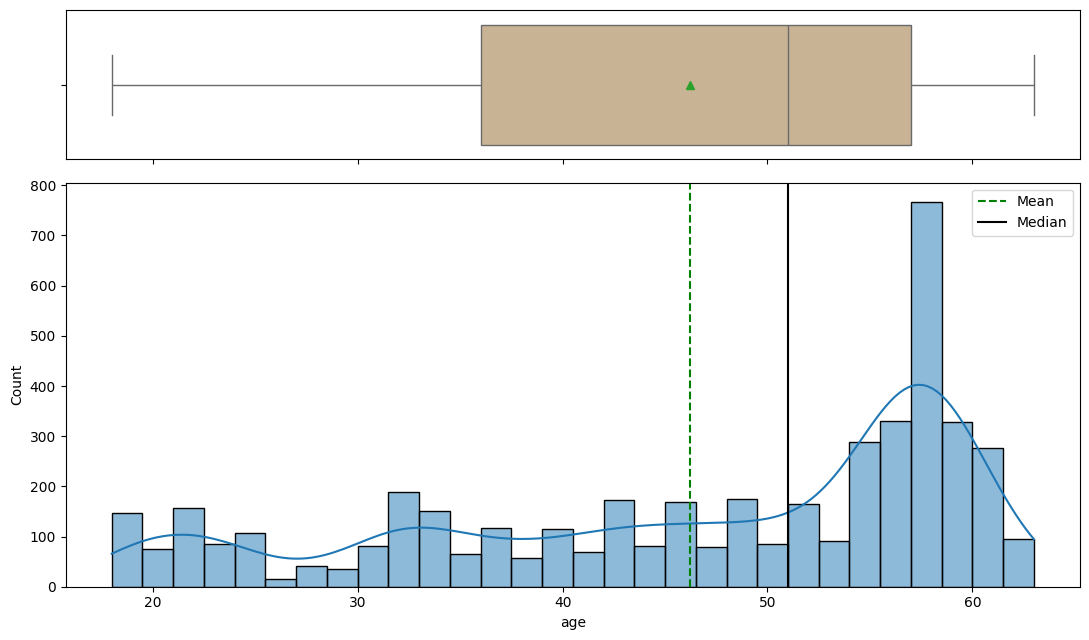

In [ ]:
# Calling boxplot_histogram function for age
boxplot_histogram (data, 'age', kde=True, bins=30)

**Observations:**

- The age data is left-skewed, with an average age of 46 years. This suggests that while the average age is middle-aged, older individuals are relatively frequent.
- The mode is 57 years, and the median is 51 years, confirming the observation of a higher concentration in the older age range.
- In 75% of observations, the age is equal to or below 57 years old.
- Despite the left-skewness indicating an older age range, there remains a proportion of younger leads extending to a minimum of 18 years old.

### Observations on number of website visits

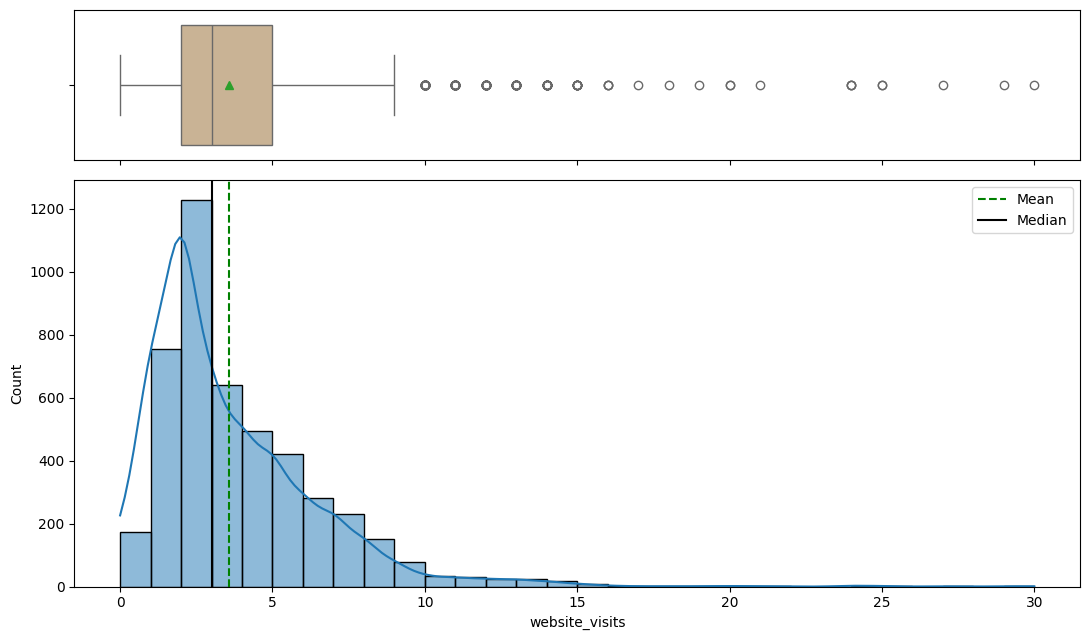

In [ ]:
# Calling boxplot_histogram function for website_visits
boxplot_histogram (data, 'website_visits', kde=True, bins=30)

**Observations:**

- The data of website visits is slightly right-skewed, although it exhibits characteristics closer to a normal distribution.
- The average number of visits (3.6) is higher than the median (3.0) and the mode (2.0), confirming that the data is right-skewed.
- The boxplot reveals the presence of several outliers, indicating that some leads have visited the website significantly more times, with a maximum of 30 visits.

In [ ]:
# Checking how many leads have not visited the website
data[data['website_visits'] == 0].shape

(174, 14)

**Observation:**

Only 174 leads (3.7%) have not visited the website.

### Observations on time spent on the website

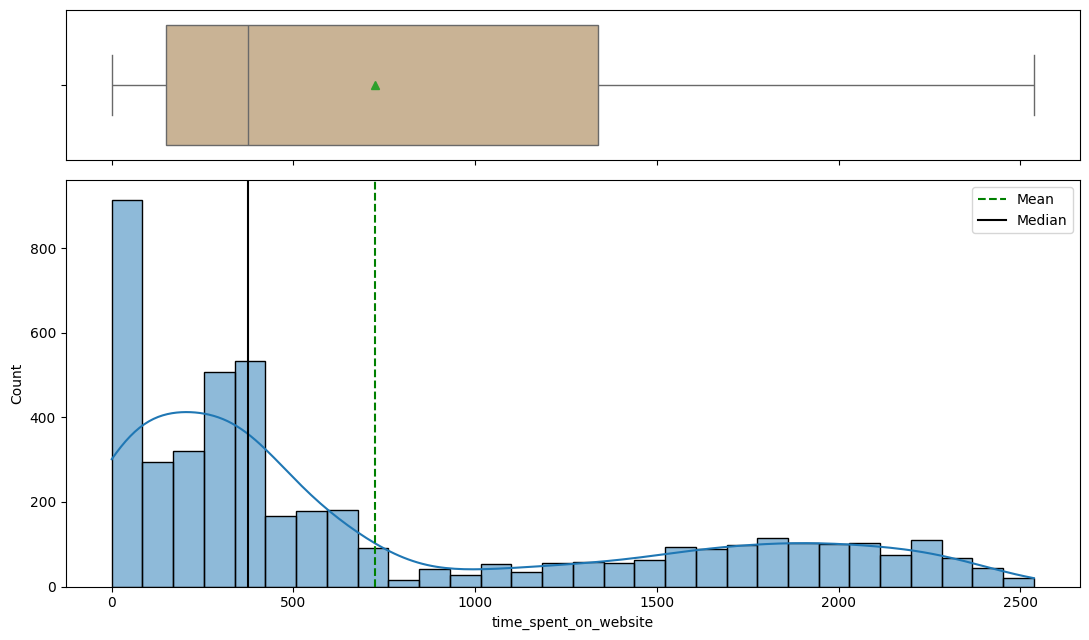

In [ ]:
# Calling boxplot_histogram function for time_spent_on_website
boxplot_histogram (data, 'time_spent_on_website', kde=True, bins=30)

**Observations:**

- The data for time spent on the website exhibits a right-skewed distribution. On average, leads spent 724 units of time, significantly higher than the median of 376 and the mode of 0.
- This suggests that while many leads spent considerable time on the website, the single value with more records is 0. Thus, some leads either did not spend any time or had their time not recorded.
- The data has a multimodal shape, including peaks above the average and a maximum of 2500 units of time.

In [ ]:
# Checking if there is any pattern among those reporting no time spent on the website
data[data['time_spent_on_website'] == 0].head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
33,56,Professional,Mobile App,Medium,0,0,0.00000,Phone Activity,No,No,No,No,No,0
37,59,Professional,Website,High,0,0,0.00000,Email Activity,No,No,No,No,No,1
54,28,Professional,Mobile App,High,0,0,0.00000,Email Activity,No,No,No,Yes,No,0
94,49,Unemployed,Website,High,0,0,0.00000,Email Activity,Yes,No,No,No,No,1
127,54,Professional,Mobile App,High,0,0,0.00000,Phone Activity,No,No,No,No,No,0


In [ ]:
# Computing how many spend no time on website
(data[data['time_spent_on_website'] == 0].shape[0])

174

**Obervation:**

Leads with a value of 0 time spent on website are only 174. This could reflect either leads who prefer engaging through phone or email. It might also reflect recording issues, as some of these leads have their first interaction through the website, although no website visits.

### Observations on number of page views per visit

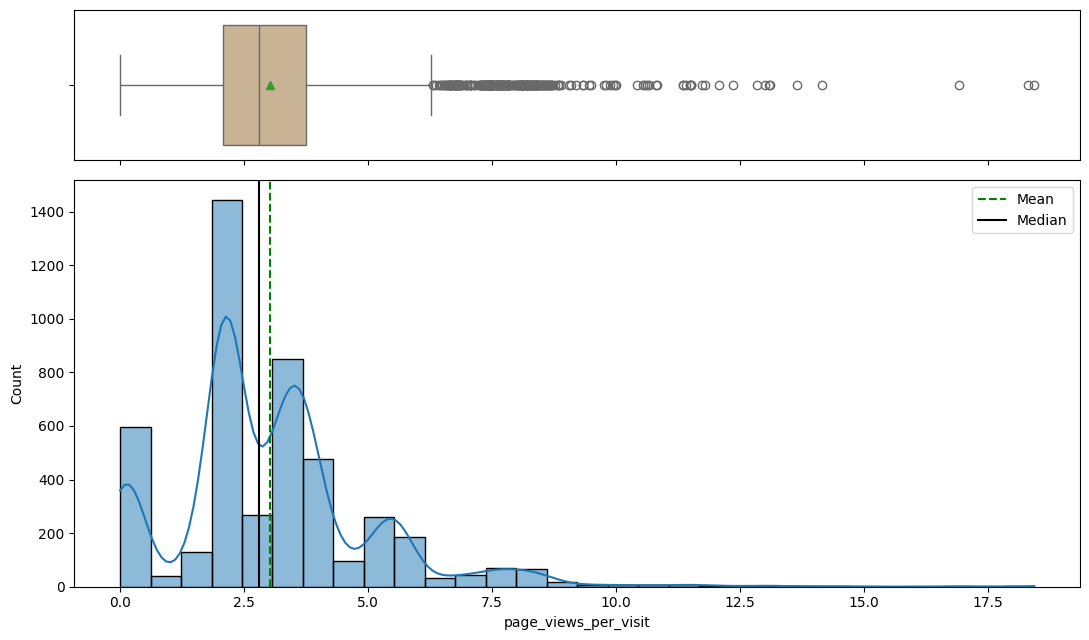

In [ ]:
# Calling boxplot_histogram function for page_views_per_visit
boxplot_histogram (data, 'page_views_per_visit', kde=True, bins=30)

**Observations:**

- The data for page views per visit is right-skewed, and has a multimodal shape.
- On average, the page views per visit is 3, which is slightly higher than the median of 2.8.
- The data for page views per visit has many outliers, with a maximum of 18.

### Categorical data univariate analysis

In [ ]:
# Creating a function for generating labeled barplots for categorical columns

def labeled_barplot (data, feature, perc=False, n=None):
    '''
    Creates a barplot with value counts or percentages labeled on each bar.

    data: DataFrame
    feature: Column name in DataFrame to plot
    perc: Boolean, whether to display percentages instead of count (default is False)
    n: Integer, displays the top n categories by count (default is None, i.e., display all categories)
    '''

    # Calculating the total count and unique count
    total = len(data[feature])
    count = data[feature].nunique()

    # Determining the figure width based on the number of categories to be displayed
    fig_width = min(count, 10) if n is None else min(n, 10)  # Set max width to 10 for readability

    # Creating the figure and axis
    plt.figure(figsize=(fig_width + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Set2',
        order=data[feature].value_counts().index[:n]
    )

    # Annotate the bars with counts or percentages
    for p in ax.patches:
        label = '{:.1f}%'.format(100 * p.get_height() / total) if perc else p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(label, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

    plt.show()


### Observations on current occupation

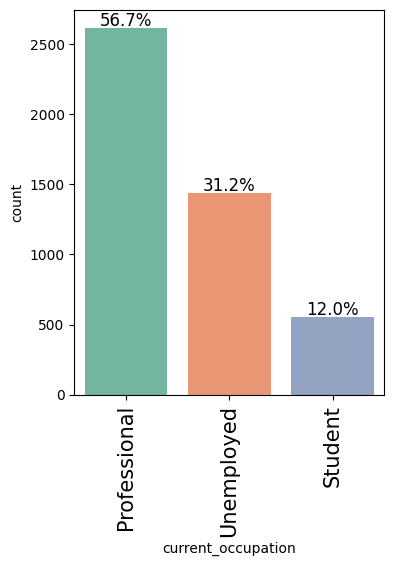

In [ ]:
# Calling labeled_barplot function for current_occupation
labeled_barplot (data, 'current_occupation', perc=True)

**Observation:**

As already noticed, the majority of leads are professionals (56.7%), followed by unemployed (31.2%), and students (12.0%), indicating the main markets.

### Observations on number of first interaction

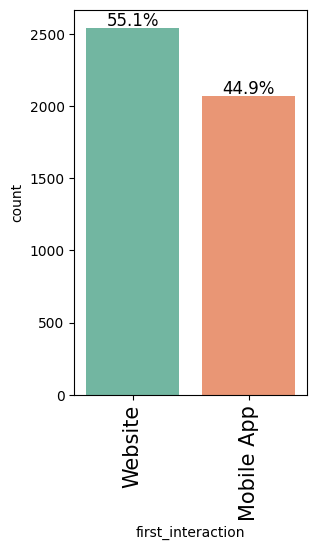

In [ ]:
# Calling labeled_barplot function for first_interaction
labeled_barplot (data, 'first_interaction', perc=True)

**Observation:**

The majority of leads' first interaction is through the website (55.1%), while the mobile app accounts for the remaining 44.9%.

### Observations on profile completed

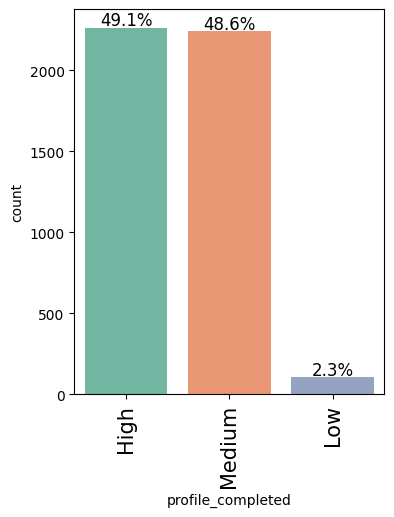

In [ ]:
# Calling labeled_barplot function for profile_completed
labeled_barplot (data, 'profile_completed', perc=True)

**Observation:**

Most leads (49.1%) have completed their profile to a high level, followed by those reaching medium completion level (48.6%). Only  2% of leads have a low completion level.

### Observations on last activity

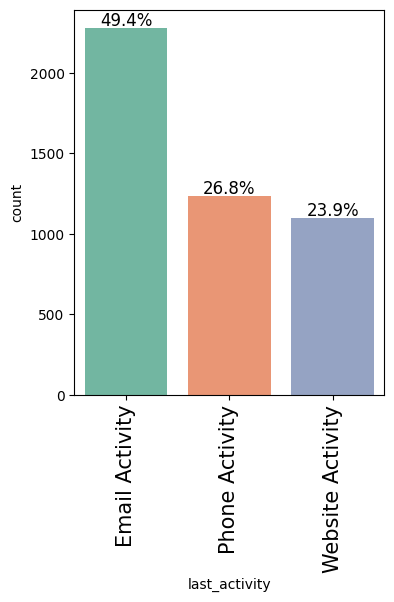

In [ ]:
# Calling labeled_barplot function for last_activity
labeled_barplot (data, 'last_activity', perc=True)

**Observation:**

The data for last activity is concentrated in email activity (49.4%), as compared to phone activity (26.8%), and website activity (23.9%).

### Observations on print_media_type1

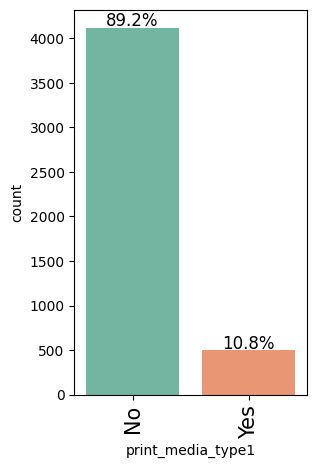

In [ ]:
# Calling labeled_barplot function for print_media_type1
labeled_barplot (data, 'print_media_type1', perc=True)

**Observation:**

Only 10.8% of the leads encountered ads of Print Media Type 1.

### Observations on print_media_type2

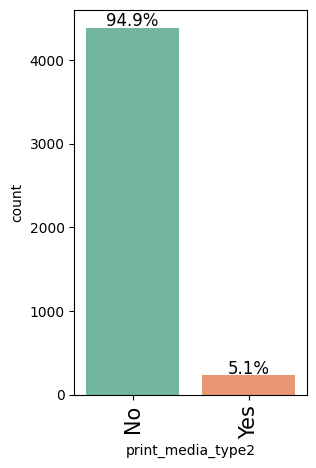

In [ ]:
# Calling labeled_barplot function for print_media_type2
labeled_barplot (data, 'print_media_type2', perc=True)

**Observation:**

Only 5.1% of the leads encountered ads of Print Media Type 2.

### Observations on digital_media

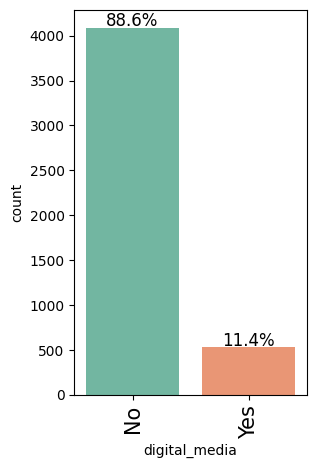

In [ ]:
# Calling labeled_barplot function for digital_media
labeled_barplot (data, 'digital_media', perc=True)

**Observation:**

A slightly higher 11.4% of leads encountered ads in digital media.

### Observations on educational_channels

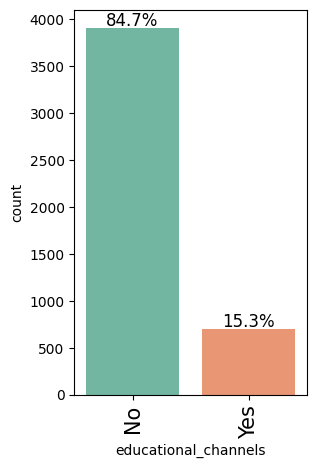

In [ ]:
# Calling labeled_barplot function for educational_channels
labeled_barplot (data, 'educational_channels', perc=True)

**Observation:**

About 15.3% of leads encountered program information through educational channels.

### Observations on referral

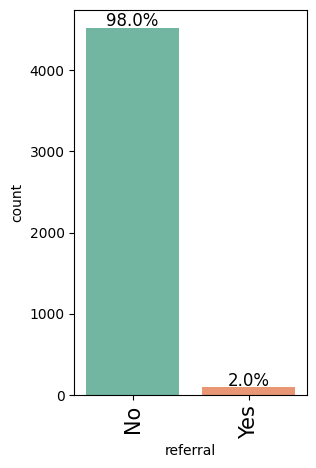

In [ ]:
# Calling labeled_barplot function for referral
labeled_barplot (data, 'referral', perc=True)

**Observation:**

Only 2% of the leads were exposed to referrals.

### Observations on status

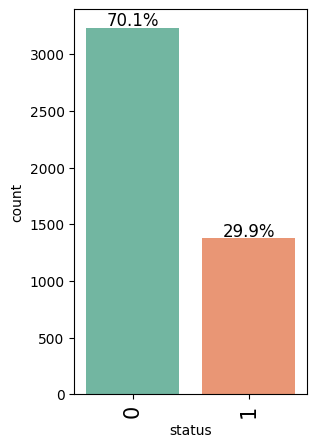

In [ ]:
# Calling labeled_barplot function for status
labeled_barplot (data, 'status', perc=True)

**Observation:**

About 29.9% of the leads convert into paid status. Thus, the data for status is imbalanced and will require to be accounted for during model building.

status
0    3235
1    1377
Name: count, dtype: int64


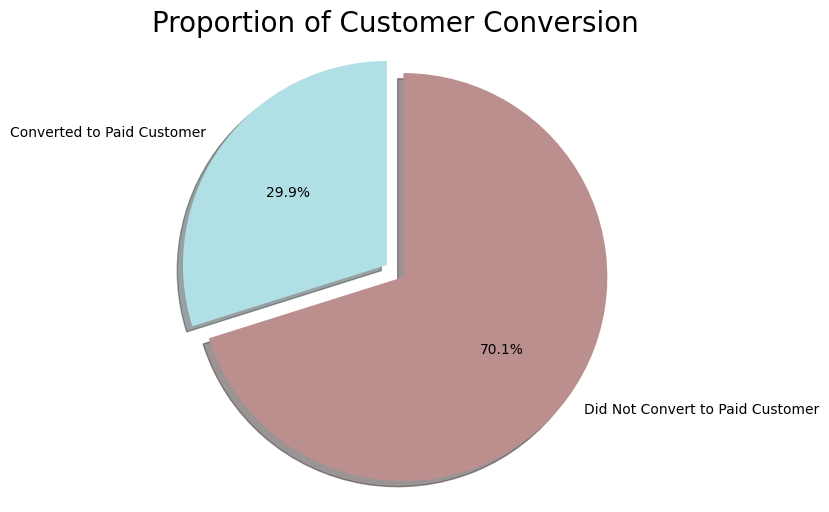

In [ ]:
# Creating a pie chart to visualize the percentage of customer conversion rate
print(data.status.value_counts())
labels = 'Converted to Paid Customer', 'Did Not Convert to Paid Customer'
sizes = [data.status[data['status']==1].count(), data.status[data['status']==0].count()]
explode = (0, 0.1)  # only 'explode' the 1st slice (i.e., 'Converted to Paid Customer')
colors = ['#B0E0E6', '#BC8F8F']
fig1, ax1 = plt.subplots(figsize=(8, 6))  # Reduced figure size
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Customer Conversion', size=20)
plt.show()

**Observations from Univariate Analysis**

- The majority of leads are professionals (56.7%), followed by unemployed individuals (31.2%), and students (12.0%). Professionals are the main market, although other segments are also relevant.
- With 55.1% of leads first interacting through the website and 44.9% via the mobile app, both channels seem relevant for initial engagement in terms of numbers of interaction.
- A high level of profile completion (49.1% high, 48.6% medium) among most leads implies good engagement with the platform.
- The target variable data is imbalanced, which will have to be taken into account during model buildig.
- The lower engagement with traditional print media (10.8% for Type1 and 5.1% for Type2) compared to digital media (11.4%) and educational channels (15.3%) suggests further assessing these strategies impact. The number of leads exposed to referrals is particularly low.

## Bivariate Analysis

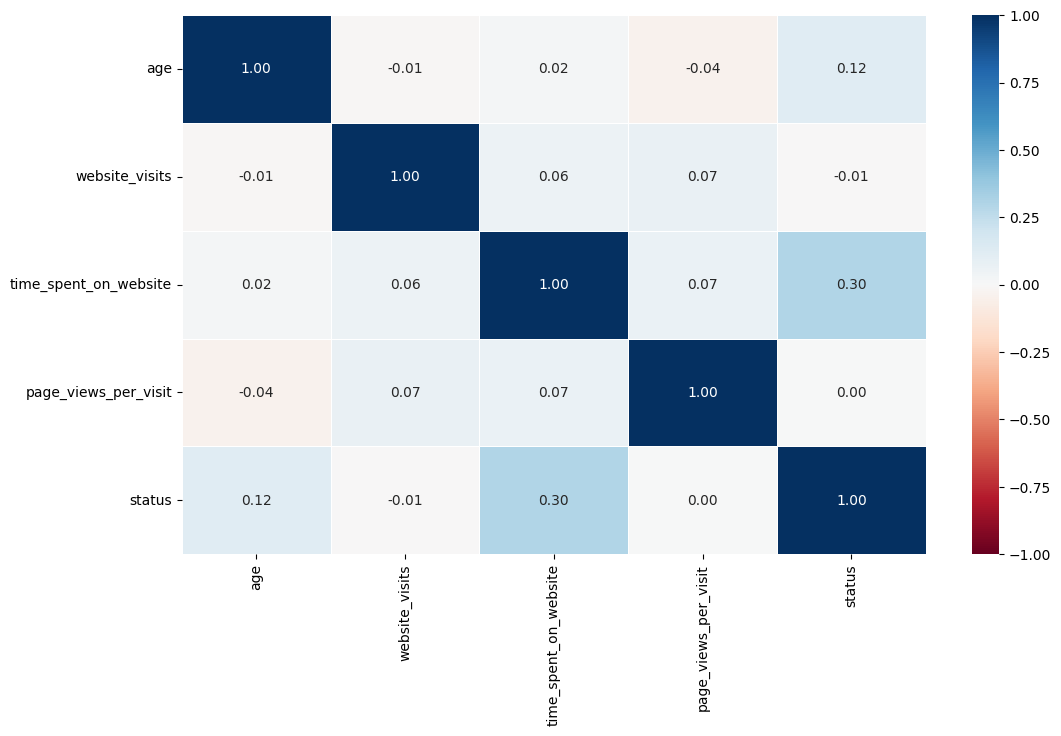

In [ ]:
# Selecting numeric columns to analyze correlations
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Creating heatmap to visualize correlation matrix of numeric columns
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='RdBu', linewidths=0.5, linecolor='white'
)
plt.show()

**Observations:**

 Correlations within the dataset are generally low. A relatively higher (yet still moderate) positive correlation is observed between time spent on the website and status, as well as between age and status. This suggests a slight tendency for older individuals and those who spend more time on the website to have a higher likelihood of conversion.

### Predictor Variable Distribution by Status Classes




In [ ]:
# Function for generating histograms and boxplots to visualize the distribution of a predictor variable by status

def distribution_plot_wrt_target(data, predictor, target):
    # Extracting the unique values of the target variable
    target_uniq = data[target].unique()

    # Creating a 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # First row: Histograms for each target value
    for i in range(2):
        axs[0, i].set_title(f'Histogram of {predictor} for {target} = {target_uniq[i]}')
        sns.histplot(
            data=data[data[target] == target_uniq[i]],
            x=predictor,
            kde=True,
            ax=axs[0, i],
            color='teal' if i == 0 else 'orange',
        )

    # Second row: Boxplots
    axs[1, 0].set_title(f'Boxplot of {predictor} by {target}')
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette='Set2')

    axs[1, 1].set_title(f'Boxplot (without outliers) of {predictor} by {target}')
    sns.boxplot(
        data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, palette='Set2'
    )

    plt.tight_layout()
    plt.show()

### Age

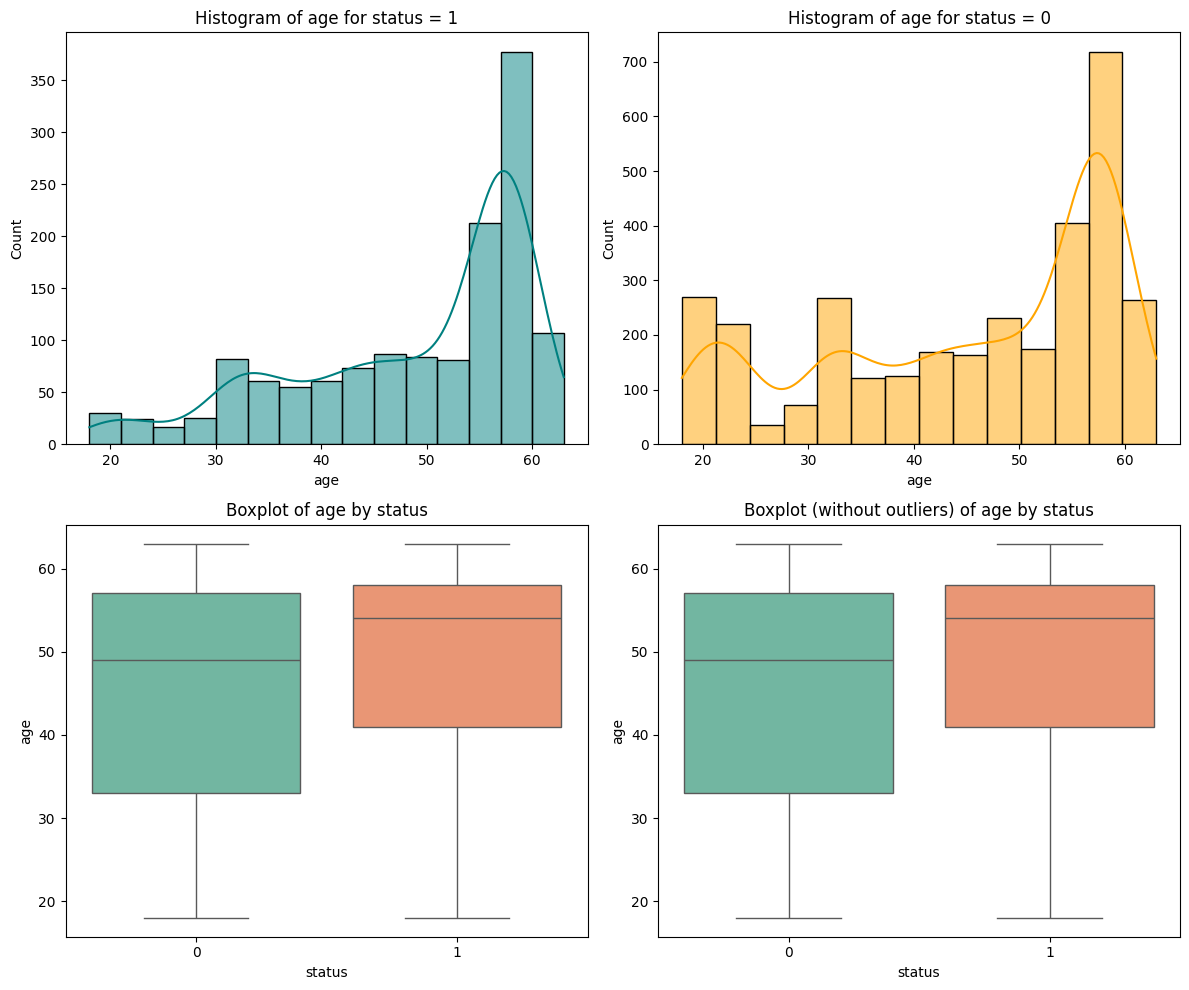

In [ ]:
# Calling the distribution_plot_wrt_target function for age
distribution_plot_wrt_target(data, 'age', 'status')

**Observations:**

- The age distribution for those who convert to paid status and those who don't are relatively similar, as the market is composed by individuals of a broadly similar age range. However, the distribution of those who don't convert has a multimodal shape, with some higher peaks among younger segments, indicating that the data for younger leads is more variable and many of these will not convert.
- The median age of those who convert is slightly higher than the median age of those who don't convert.

### Website visits

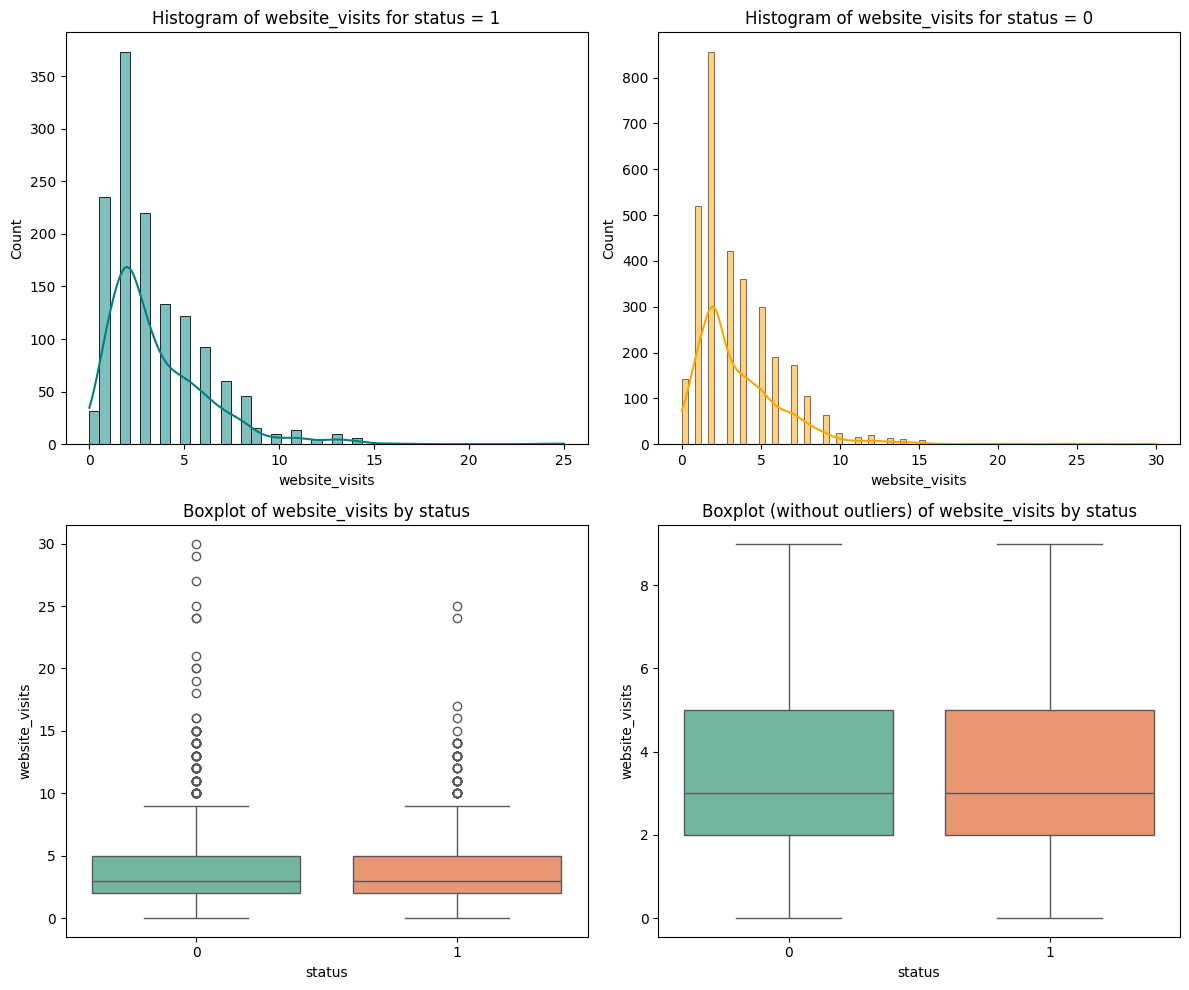

In [ ]:
# Calling the distribution_plot_wrt_target function for website_visits
distribution_plot_wrt_target(data, 'website_visits', 'status')

**Observation:**

The median number of website visits for both population segments is similar, suggesting limited predictive power. However, class 0 has more outliers, which could provide some information to the analysis, as the distribution will vary.

### Time spent on website

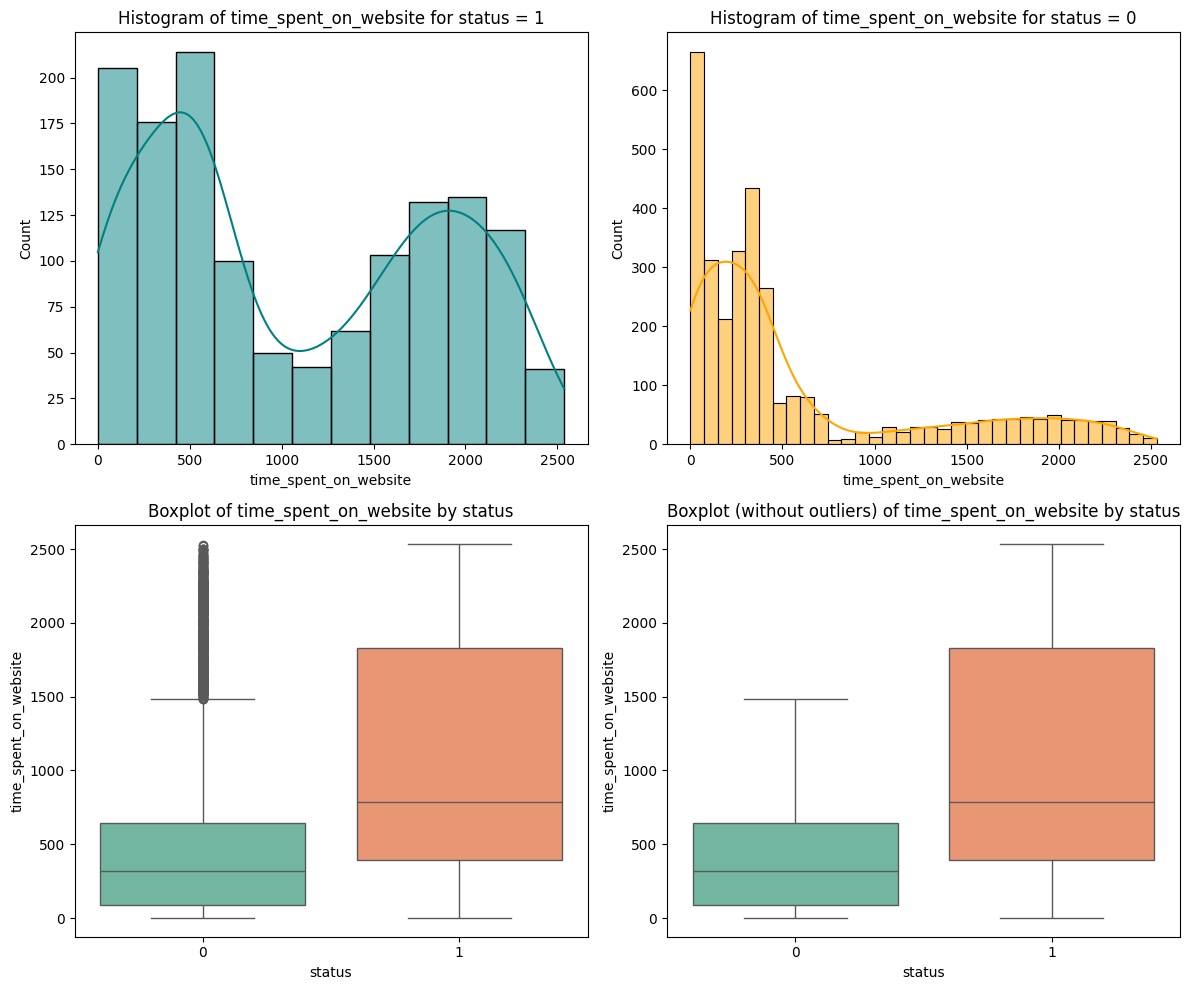

In [ ]:
# Calling the distribution_plot_wrt_target function for time_spent_on_website
distribution_plot_wrt_target(data, 'time_spent_on_website', 'status')

In [ ]:
# Checking the median time spent on the website by status
data.groupby(['status'])['time_spent_on_website'].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Observations:**

- The data distribution of those who convert to paid status shows relatively higher peaks in ranges with more time spent on the website, as compared to the distribution of those who don't convert.
- The median time spent on the website is higher for those who convert. Among those who don't convert, there are several outliers, and 75% of the observations show a significantly lower number of time spent than those who convert.

### Page views per visit

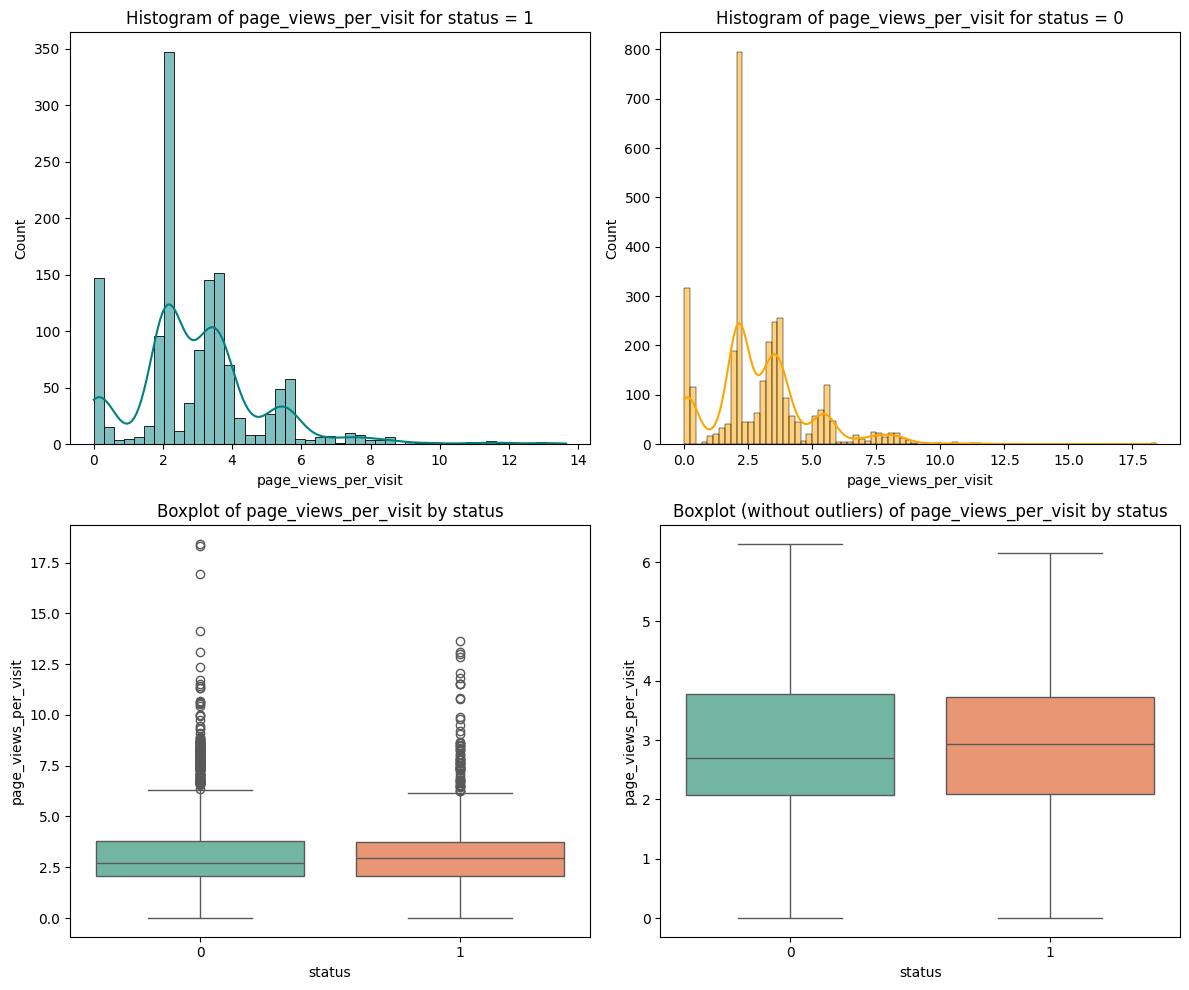

In [ ]:
# Calling the distribution_plot_wrt_target function for page_views_per_visit
distribution_plot_wrt_target(data, 'page_views_per_visit', 'status')

**Observation:**

The data for page views per visit of both population segments are relatively similar. However, the median is slightly higher among those that convert, while those who don't convert have more outliers.

### Categorical Data Predictor Distribution by Status Classes

In [ ]:
# Function for generating stacked barplot to visualize the count of predictor variable by status

def stacked_barplot (data, predictor, target):
    '''
    Print the category counts and plot a stacked bar chart

    data: DataFrame
    predictor: independent variable
    target: target variable
    '''
    # Calculating the unique count of the predictor for plot sizing
    count = data[predictor].nunique()

    # Determining the least frequent category in the target variable for sorting
    sorter = data[target].value_counts().index[-1]

    # Creating and printing a crosstab with margins, sorted by the least frequent target category
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)

    # Generating a normalized crosstab for plotting the stacked bar chart
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)

    # Plotting the stacked bar chart
    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 5), color = ['#729ECE', '#E57373'])
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

### Current occupation

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


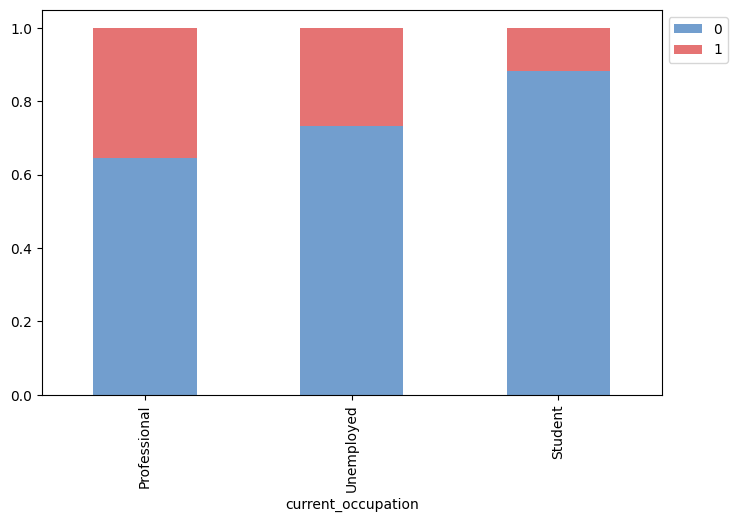

In [ ]:
# Calling stacked_barplot function for current_ocupation
stacked_barplot (data, 'current_occupation', 'status')

**Observation:**

Among leads that are professionals, the likelihood of converting to paid status is higher compared to the other categories, while the conversion rate is particularly low among students.

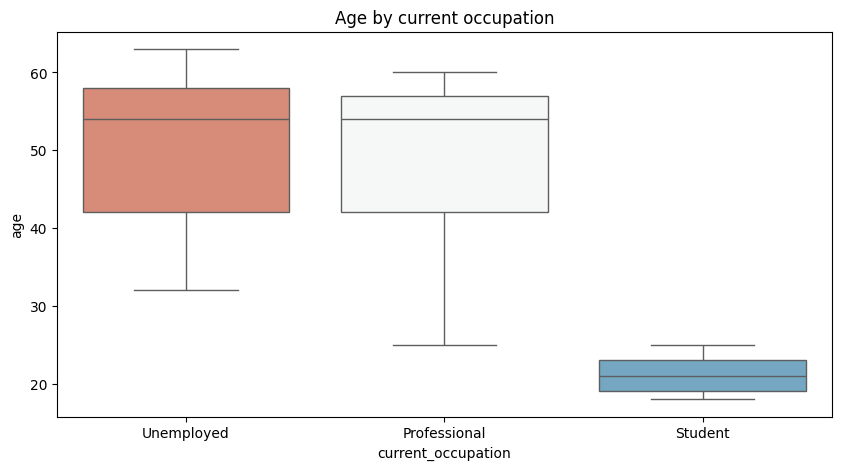

In [ ]:
# Boxplot to compare age distributions across occupation categories
plt.figure(figsize=(10, 5))
sns.boxplot(x='current_occupation', y='age', data=data, palette='RdBu')
plt.title ('Age by current occupation');

In [ ]:
# Descriptive statistics for age by occupation
data.groupby(['current_occupation'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**Observation:**

The average age of professionals and unemployed is similar, while that of students is comparatively lower. As indicated, the conversion rates are higher for professionals and unemployed.

### First interaction

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


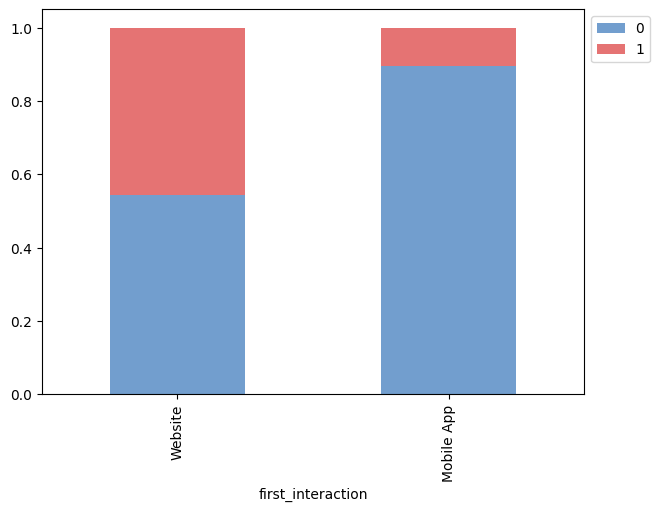

In [ ]:
# Calling stacked_barplot function for first_interaction
stacked_barplot (data, 'first_interaction', 'status')

**Observation:**

The conversion rate for leads whose first interaction is through the website is significantly higher compared to those who first interact via the mobile app.

### Print Media Type1

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


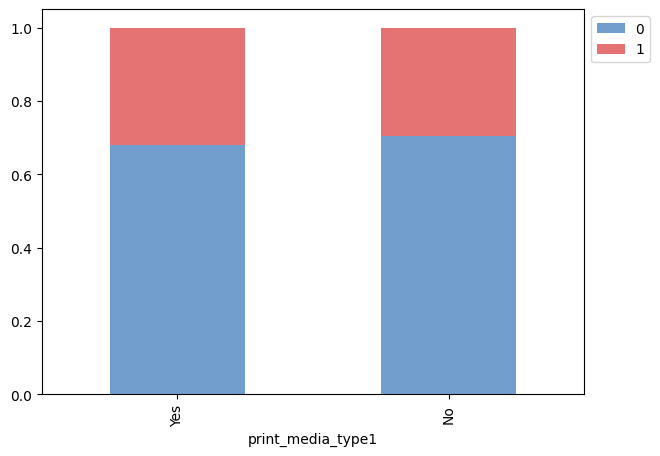

In [ ]:
# Calling stacked_barplot function for print_media_type1
stacked_barplot (data, 'print_media_type1', 'status')

**Observation:**

The conversion rate for leads that are exposed to Print Media Type1 is only slightly higher than among those who are not exposed, indicating modest effect.

### Print Media Type2

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


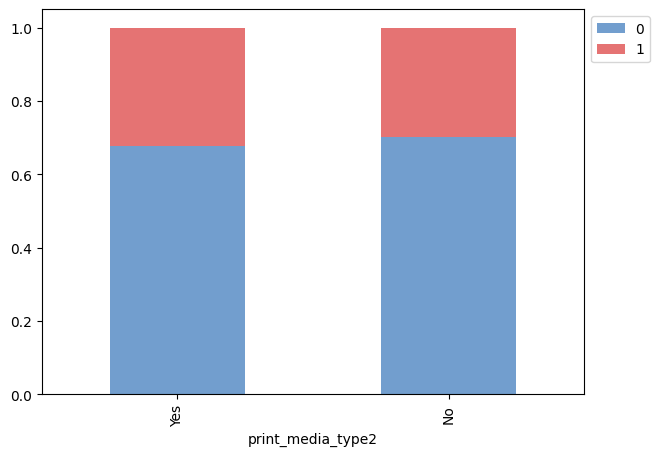

In [ ]:
# Calling stacked_barplot function for print_media_type2
stacked_barplot (data, 'print_media_type2', 'status')

**Observation:**

The conversion rate for leads who are exposed to Print Media Type2 is also slightly higher than among those who aren't.

### Digital Media

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


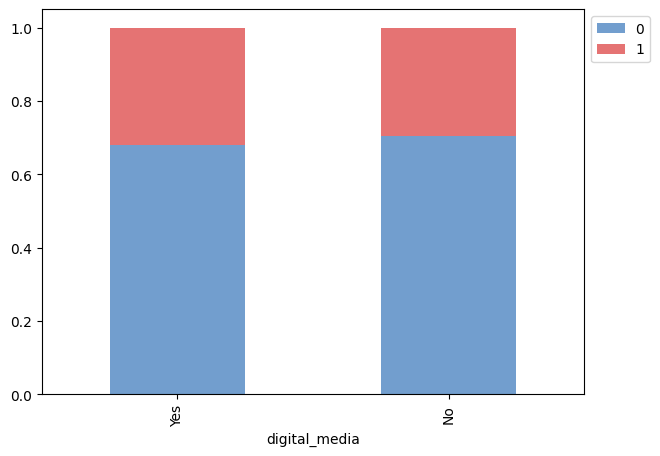

In [ ]:
# Calling stacked_barplot function for digital_media
stacked_barplot (data, 'digital_media', 'status')

**Observation:**

The conversion rate for leads who are exposed to digital media is also slightly higher than among those who aren't.

### Educational Channels

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


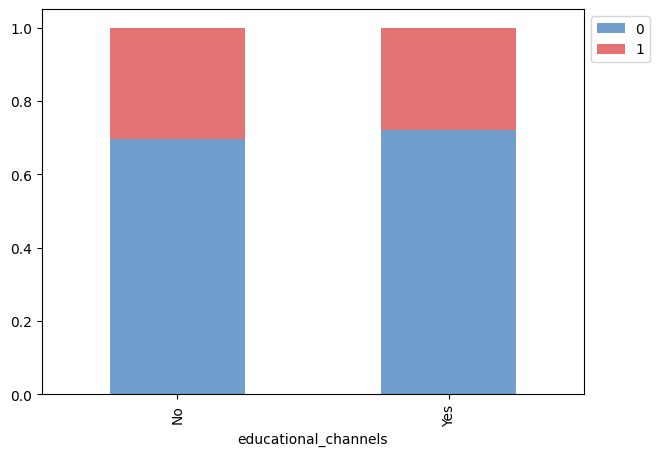

In [ ]:
# Calling stacked_barplot function for educational_channels
stacked_barplot (data, 'educational_channels', 'status')

**Observation:**

The conversion rate for leads who are exposed to educational channels is slightly higher than among those who aren't.

### Referral

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


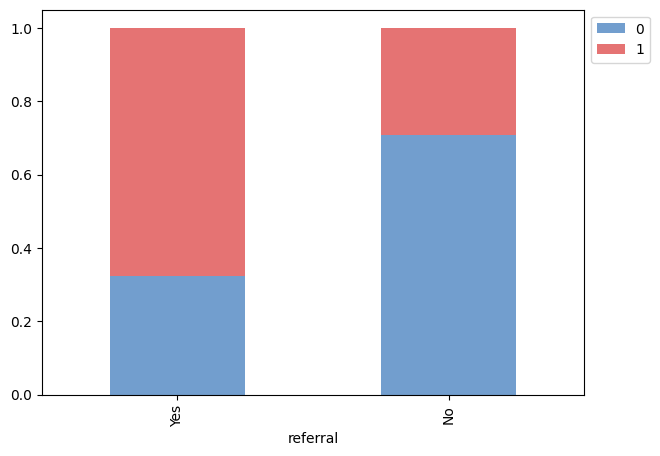

In [ ]:
# Calling stacked_barplot function for referral
stacked_barplot (data, 'referral', 'status')

**Observation:**

The conversion rate for leads who are exposed to referral is significantly higher than among those who aren't. This indicates that this channel is less frequent but highly effective.

### Last activity

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


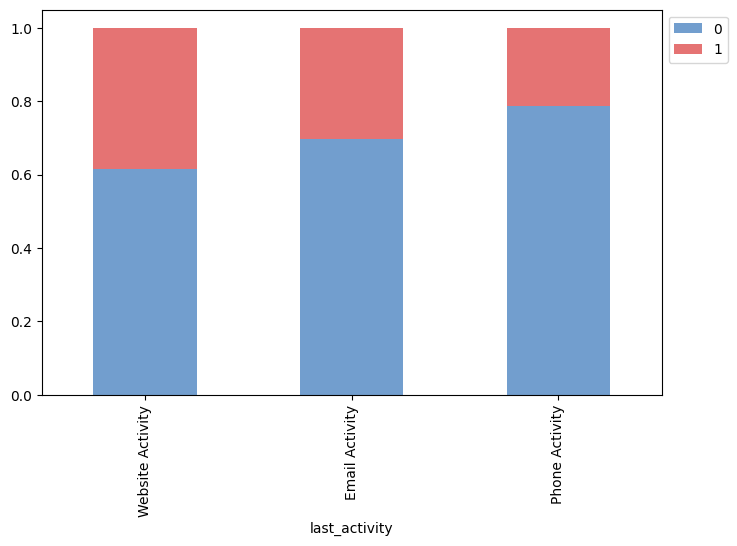

In [ ]:
# Calling stacked_barplot function for last_activity
stacked_barplot (data, 'last_activity', 'status')

**Observation:**

For the last_activity variable, website activity has a higher conversion rate than email, and phone.

### Profile completed

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


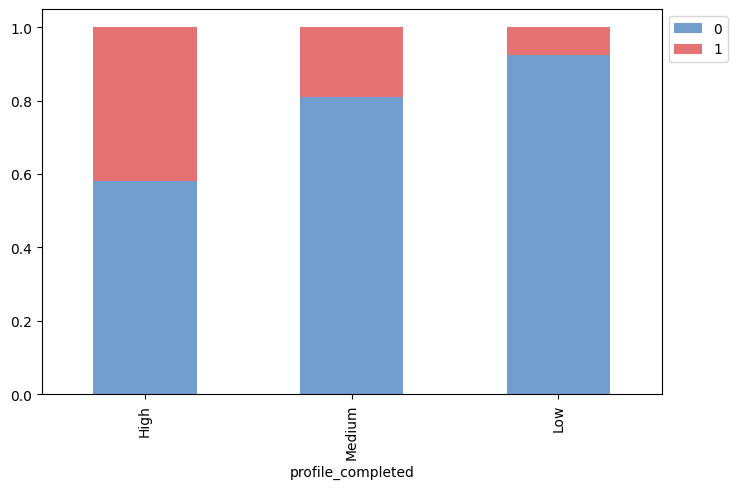

In [ ]:
# Calling stacked_barplot function for profile_completed
stacked_barplot (data, 'profile_completed', 'status')

**Observation:**

The conversion rate is significantly higher among leads that have a high profile completion level.

**Observations from Bivariate Analysis**

- Professionals are more likely to convert to paid status, while students show significantly lower conversion rates.
- Leads initiating contact through the website have a higher conversion rate than those starting via the mobile app.
- For the last activity variable, website activity shows a higher conversion rate than email or phone.
- Exposure to print media (types 1 and 2) and digital media shows a modest increase in conversion rates. Educational channels show a slightly improved conversion rate, although the impact is also relatively modest. Leads exposed to referrals show a significantly higher conversion rate, despite their smaller numbers.
- Those completing their profile to a high level have a significantly higher conversion rate.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outliers check

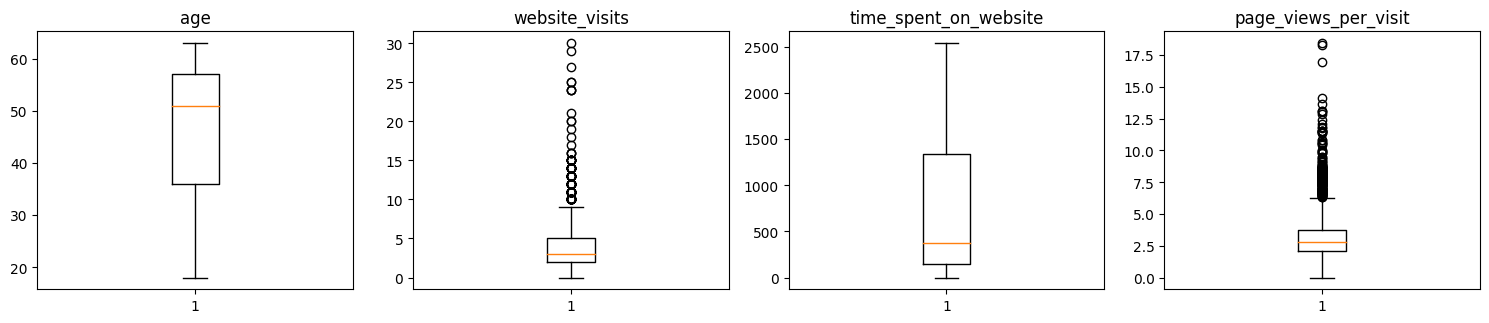

In [ ]:
# Detecting outliers using boxplots for numeric variables
# Selecting numeric columns, excluding status
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('status')

# Creating subplots for numeric variables
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

- Decision trees are generally robust to outliers. Unlike linear regression models and other algorithms, decision trees don't make assumptions about the distribution of the data. For this reason, outliers treatment may be required only in cases with exceptional, extreme outliers, which is not the case here.
- Also, as we have already seen, both categories with outliers (website_visits, and page_views_per_visit) don't have a strong predictive power, as both have a similar distribution among the leads who convert and those who don't. Thus, the presence of outliers is even less concerning from a modeling perspective, as it will have no significant impact in the model's predictions.

### Data preparation for modeling

In [ ]:
# Separating the dependent variable (Y) and the independent variables (X)
Y = data.status
X = data.drop(['status'], axis=1)

# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = categ_cols

# Creating dummy variables
X = pd.get_dummies(X, columns=to_get_dummies_for, drop_first=True)

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size=0.3, random_state=1, stratify=Y)

In [ ]:
# Displaying training and test dataset shapes and class distribution
print('Shape of training set : ', x_train.shape)
print('Shape of test set : ', x_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70136
1   0.29864
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.70159
1   0.29841
Name: proportion, dtype: float64


## Building Classification Models

**Model evaluation criterion**

Possible wrong predictions:

1. Predicting a lead will be converted, when in reality the lead would not be converted.
2. Predicting a lead will not be converted, when in reality the lead would have been converted.

Which type of error is more important in this case?

1. Predicting that a lead will convert but the lead doesn't convert (false positive) would translate into investing resources inefficiently on a wrong lead.
2. Predicting that a lead will not convert but the lead would have  converted (false negative) would make the company loose a customer, which is more important in terms of our model purpose.

Thus, we will develop a model with a good performance in terms of Recall. The greater the Recall, the higher the chances of minimizing false negatives. This enables the company to concentrate resources on leads with genuine conversion potential, aligning with the objective of maximizing conversions.

**Creating a function to calculate and display the classification report and confusion matrix so that we can apply on each model without having to repeatedly rewrite the same code.**

In [ ]:
# Function for generating classification report and confusion matrix

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

In [ ]:
# Function for computing and displaying a summary of the macro scores only

def model_performance_classification(model, predictors, target):
    '''
    To provide metrics summary

    model: classifier

    predictors: independent variables

    target: dependent variable
    '''

    # Predicting using the independent variables
    pred = model.predict(predictors)

    # Computing macro metrics
    recall = recall_score(target, pred, average='macro')

    precision = precision_score(target, pred, average='macro')

    acc = accuracy_score(target, pred)


    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            'Precision':  precision,
            'Recall':  recall,
            'Accuracy': acc,
        },

        index = [0],
    )

    return df_perf


### Building Decision Tree Model

In [ ]:
# Building decision tree model with adjusted class weight to avoid class imbalance impacting the model

dt = DecisionTreeClassifier (class_weight={0: 0.30, 1: 0.70}, random_state=1)

In [ ]:
# Fitting decision tree model

dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

### Checking model performance on the training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



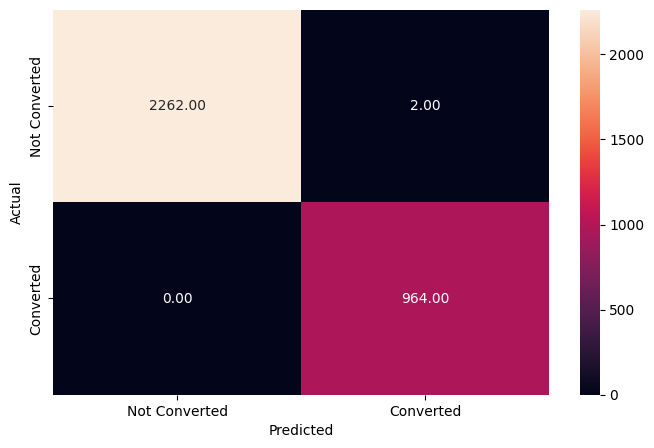

In [ ]:
# Checking performance on the training set
y_pred_train1 = dt.predict(x_train)

metrics_score(y_train, y_pred_train1)

**Observation:**

The model is performing robustly in terms of most metrics, with **scores of 100%** for all of them. We can expect the decision tree to be overfitting the trainig data at this stage, as we have not implemented pruning or other techniques to avoid overfitting.

### Checking model performance on the test set

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.66      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.75      1384
weighted avg       0.79      0.79      0.79      1384



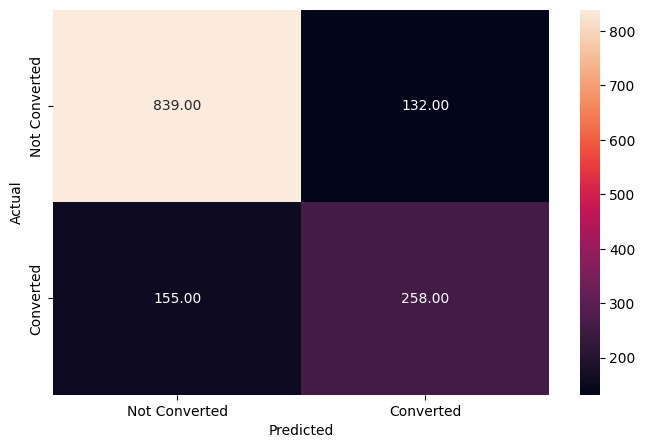

In [ ]:
# Checking performance on test data
y_pred_test1 = dt.predict(x_test)

metrics_score(y_test, y_pred_test1)

**Observations:**

- The metric scores are lower on the test data as compared to the training data. For example, the recall score for the positive class is 0.6 on the test data, as compared to 1 on the training data. This suggests that the model is overfitting the training data.
- The precision for class 1 on the test data suggests that there's a 34% (1 - 0.66) chance that the model will predict that a lead will convert even though he/she would not, i.e. the company would waste resources on leads who will not be converted.

### Macro scores summary

In [ ]:
# Calling macro scores function
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.75280,0.74438,0.79263


**Observation:**

While our main goal is to maximize recall for class 1, we still would like to have a model with the best overall performance. In this table, we can see that the average precision, recall, and accuracy scores are below 80%, and we may try to improve performance by tuning the model.

## Decision Tree - Hyperparameter Tuning

In [ ]:
# Choosing the type of classifier
dt_tuned = DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
grid_obj = GridSearchCV(dt_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(x_train, y_train)

# Setting the classifier to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fitting the optimized algorithm to the data
dt_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=1)

### Checking model performance on training and test set

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



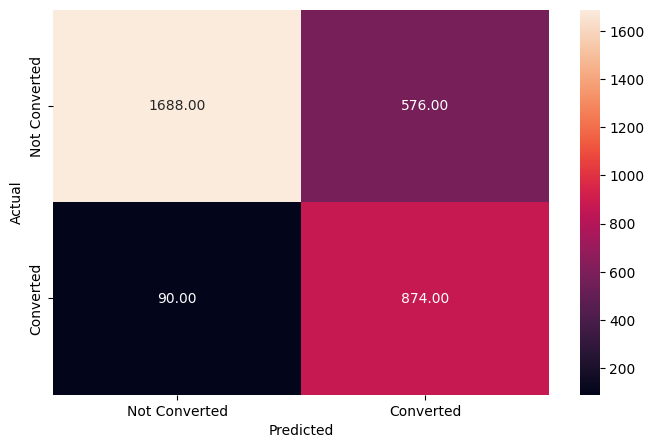

In [ ]:
# Checking performance on the training set
y_pred_train2 = dt_tuned.predict(x_train)

metrics_score(y_train, y_pred_train2)

**Observation:**

Compared to the model with default hyperparameter values, the performance on the training set has decreased. This makes sense, as we are trying to reduce overfitting. For example, the model chance of making a false negative error on class 1 has increased from 0% to 9%, while that of making a false positive error on class 1 has increased from 0% to 40%.

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



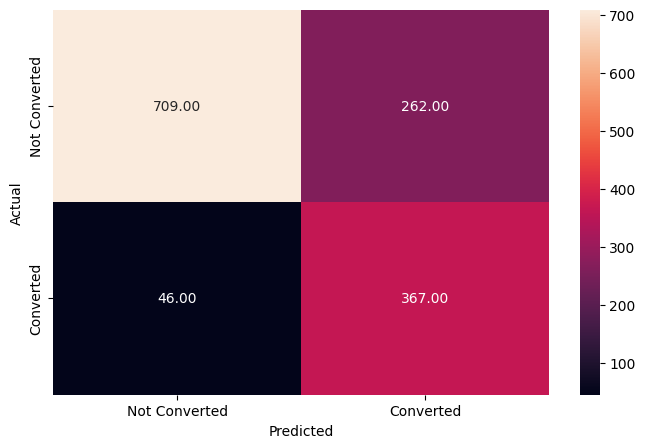

In [ ]:
# Checking performance on the test set
y_pred_test2 = dt_tuned.predict(x_test)

metrics_score(y_test, y_pred_test2)

**Observations:**

- The performance gap between the training and test set is small, as we have successfully reduced overfitting.
- Compared to the model without tuning, the chance of making a false negative error for class 1 on the test data has decreased from 38% to 11%.
- Other performance scores have improved as well. For example, the precision score for class 0 has increased from 0.84 to 0.94.

### Macro scores summary

In [ ]:
# Calling macro scores function
dtree_test2 = model_performance_classification(dt_tuned,x_test,y_test)
dtree_test2

,Precision,Recall,Accuracy
0,0.76127,0.80940,0.77746


**Observation:**

The overall performance on the test data has improved compared to the model without tuning. For example, average recall increased from 0.74 to 0.81, while average precision increased slightly from 0.75 to 0.76. Accuracy slightly decreased from 0.79 to 0.78. Most scores have improved or are broadly stable, with significant improvement in terms of the target variable.

## Visualizing the Decision Tree

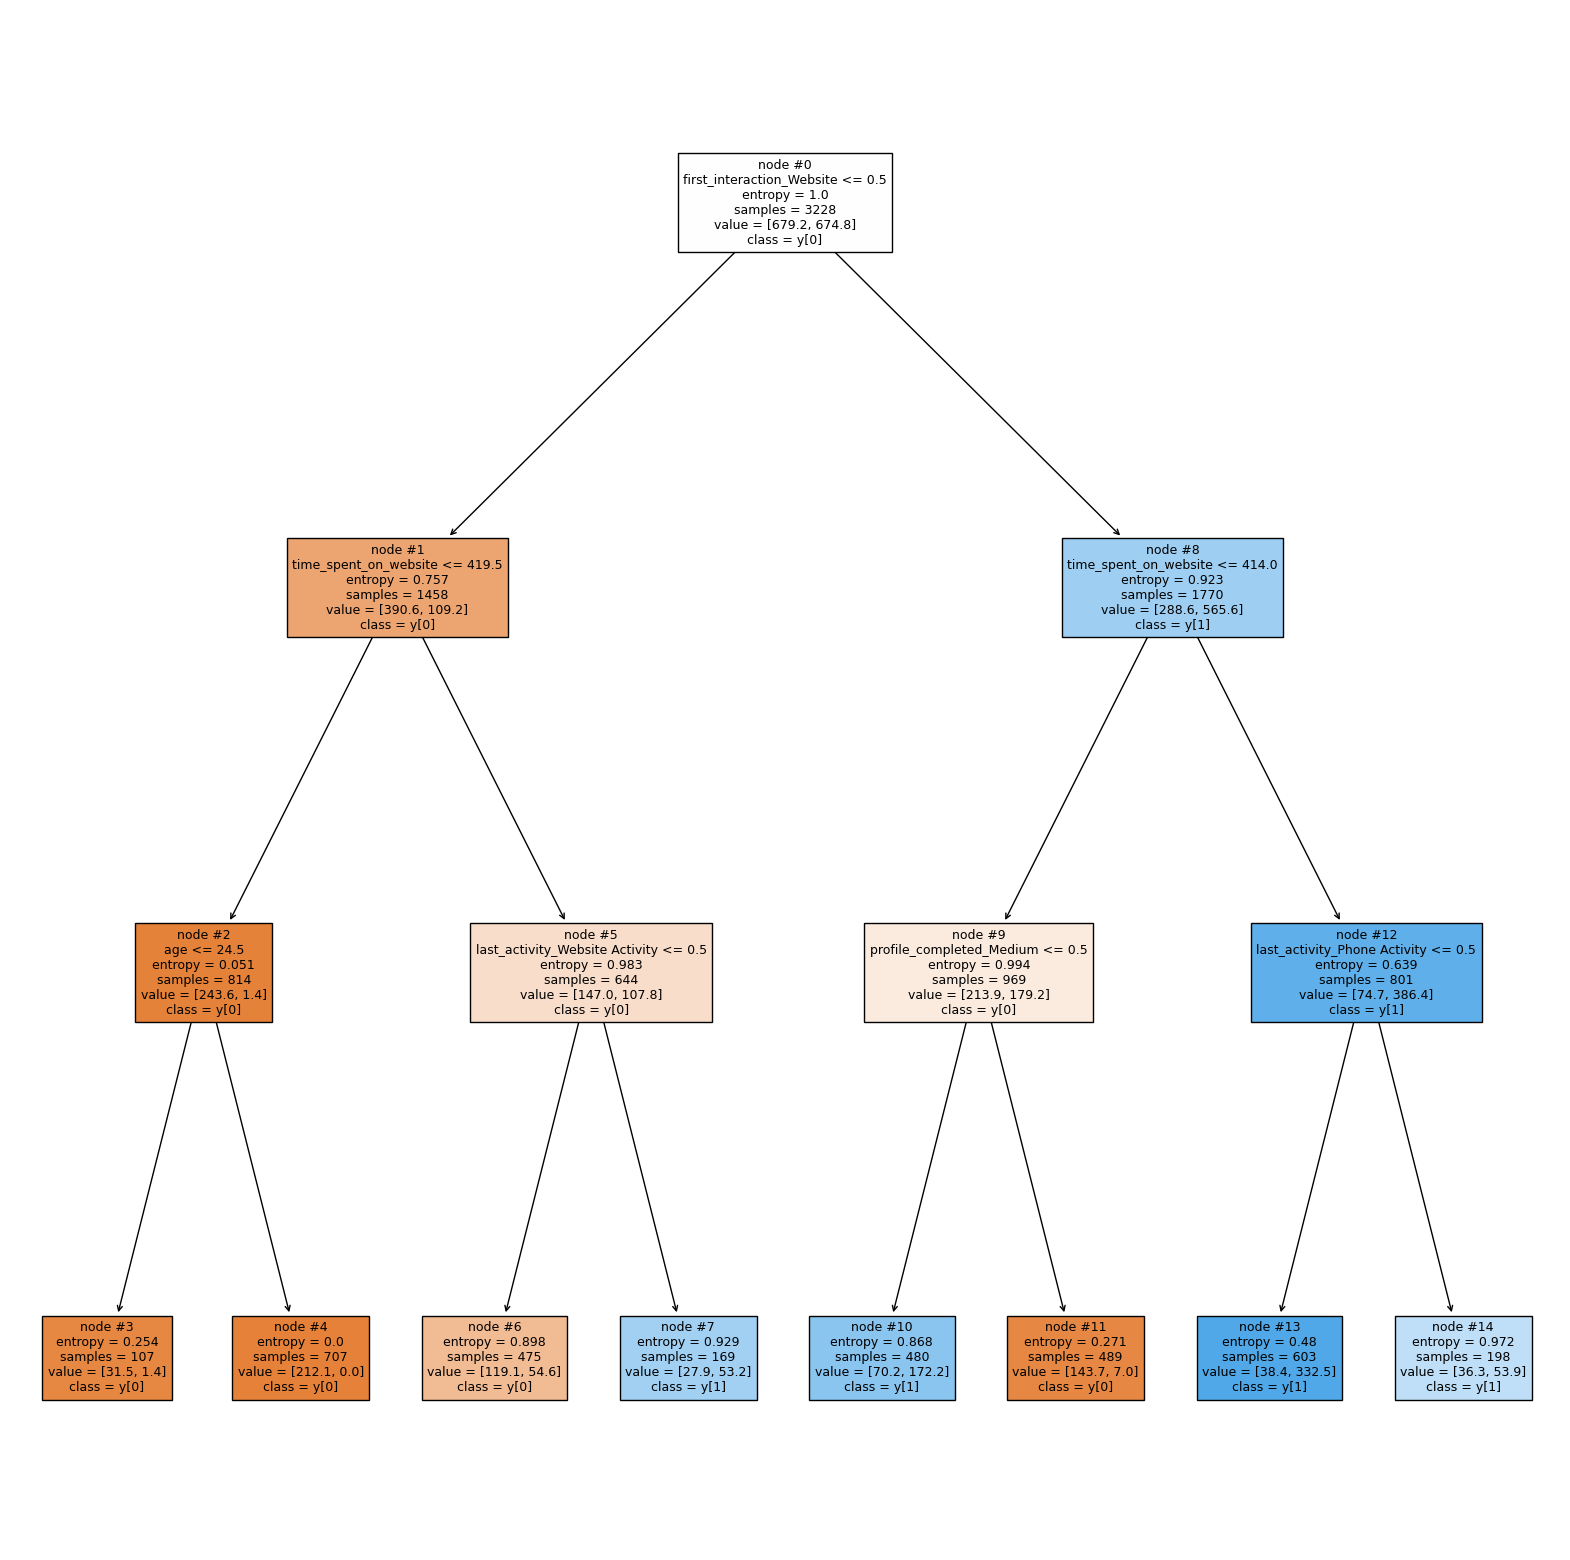

In [ ]:
# Visualizing the tuned decision tree

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(dt_tuned, feature_names=features, filled=True, fontsize=9, node_ids=True, class_names=True)

plt.show()

**Observations:**

- At the root node, the criteria discerning leads who first interacted through the website versus those who did so through the mobile app has the highest predictive power. This may reflect that the website is mainly used for this kind of educational search.

**Left branch:**

- Among those who don't interact through the website first, the model predicts that most will actually not convert, as reflected through nodes 1-6. These nodes classify data according to criteria including time spent on the website <= 419.5, age <= 24, and last activity through the website. The criteria of age <= 24 may reflect our prior observations that younger leads have different patterns than older leads.
- Only a small number of samples, 169 out of 1458 will convert to paid status among the leads in the left branch, according to the model prediction.

**Right branch:**

- Among those who interact through the website first, the model predicts that most will likely convert to paid status.
- Among these, there is a stronger likelihood of converting among leads who spend more than 414.0 units of time on the website, and their last activity is not on the phone.
- If the lead spends less than 414.0 units of time on the website, but complete the profile to a high level (approximately, not medium), the lead is predicted to convert, as high level completion indicates high conversion rate.

### Feature importance

In [ ]:
# Displaying the importance of features to gain a better understanding of the model
print (pd.DataFrame(dt_tuned.feature_importances_, columns = ['Imp'], index=x_train.columns).sort_values(by='Imp', ascending=False))

                                   Imp
time_spent_on_website          0.36555
first_interaction_Website      0.31348
profile_completed_Medium       0.23370
last_activity_Phone Activity   0.04840
last_activity_Website Activity 0.03201
age                            0.00685
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


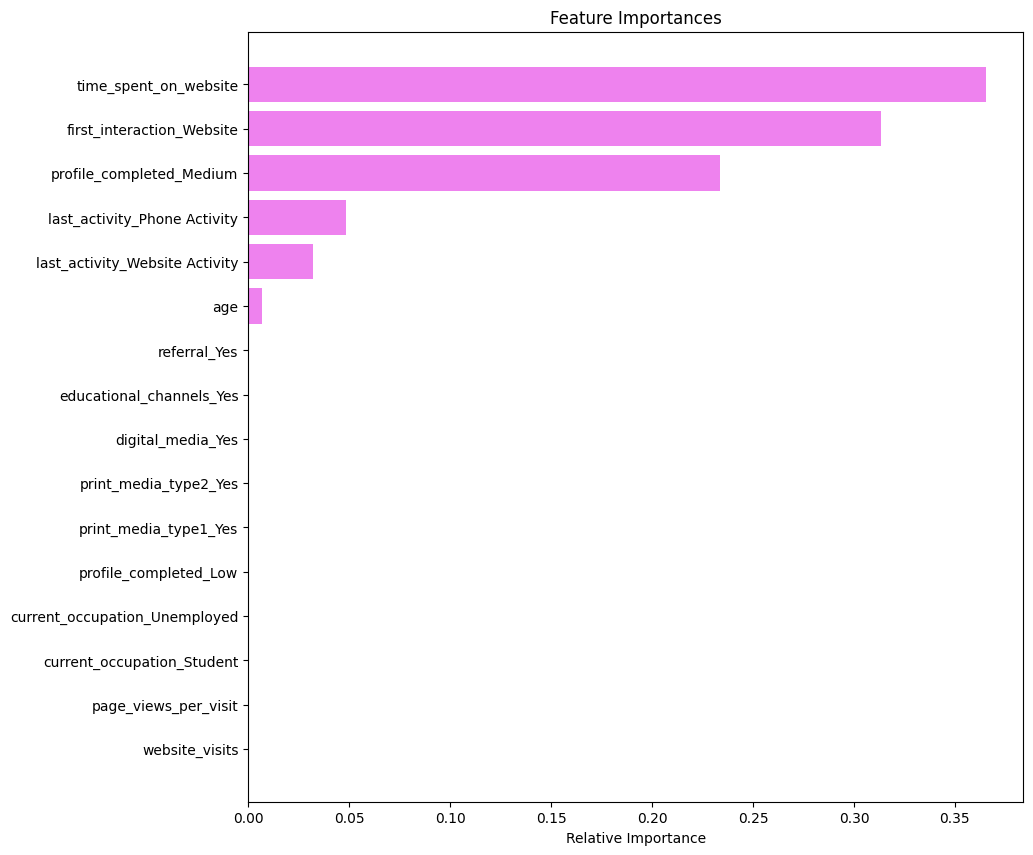

In [ ]:
# Plotting the feature importance
importances = dt_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize=(10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='violet', align='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

- Time spent on the website has the strongest predictive importance in this model, followed by first interaction through website, profile completion level (high level of completion, approximately 1 - medium level), last activity, and age.
- The model might imply some bias, as it may have over-simplified the problem and is not capturing the patterns associated with other variables.
- The model has simplified the prediction criteria to 5 variables. This may reflect in part our prior observations that many variables have weaker predictive power, including page views per visit and ads exposure.
- However, some seemingly meaningful variables, such as current occupation have no role in this model. Age plays only a weaker role in the left branch, which in part reflects the greedy algorithm.
- The model provides an intuitive sense of prediction with informative power: **those who spend more time on the website, have initially interacted through the website, and have high profile completion have higher likelihood of converting**.
- However, the chances of false positives and false negatives stand at around 20-24%, so we will build a random forest to check if it can show higher performance.

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

### Checking model performance on the training set


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



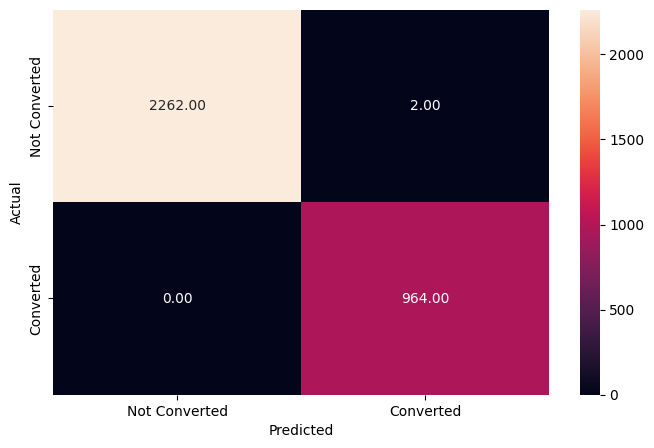

In [ ]:
# Checking performance on the training set
y_pred_train3 = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train3)

**Observation:**

The model is likely overfitting the training data, with performance scores of 100%.

### Checking model performance on the test set

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       971
           1       0.81      0.72      0.76       413

    accuracy                           0.87      1384
   macro avg       0.85      0.82      0.83      1384
weighted avg       0.86      0.87      0.86      1384



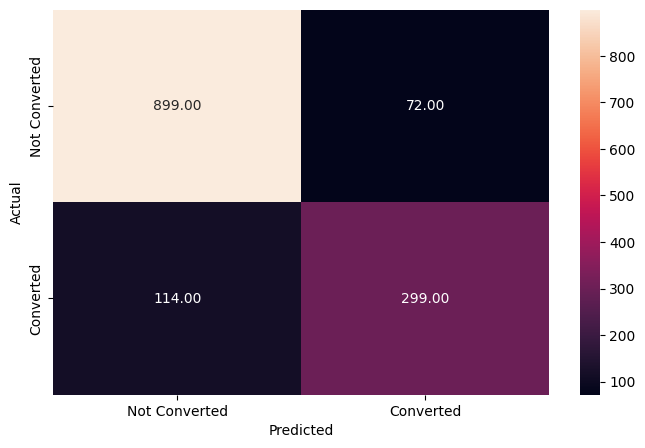

In [ ]:
# Checking performance on the test set
y_pred_test3 = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test3)

**Observation:**

- The model seems overfitting the training data, as perfomance is lower on the test data.
- The model score of 0.72 for recall on class 1 on the test data is lower than the 0.89 from the last decision tree, while other scores show comparatively better performance. Let's see if tuning can improve performance.

### Random Forest Classifier - Hyperparameter Tuning

In [ ]:
# Choosing the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion='entropy', random_state=1)

# Grid of parameters to choose from
parameters_rf = {'n_estimators': [110, 120],
    'max_depth': [6, 7],
    'min_samples_leaf': [20, 25],
    'max_features': [0.8, 0.9],
    'max_samples': [0.9, 1],
    'class_weight': ['balanced',{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Runnig the grid search on the training data using scorer=scorer and cv=5
grid_obj2 = GridSearchCV (rf_estimator_tuned, parameters_rf, scoring=scorer, cv=5)

grid_obj2 = grid_obj2.fit (x_train, y_train)

# Saving the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj2.best_estimator_

#Fitting the best estimator to the training data
rf_estimator_tuned.fit (x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=1)

## Checking model performance on training and test set



              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2264
           1       0.68      0.89      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



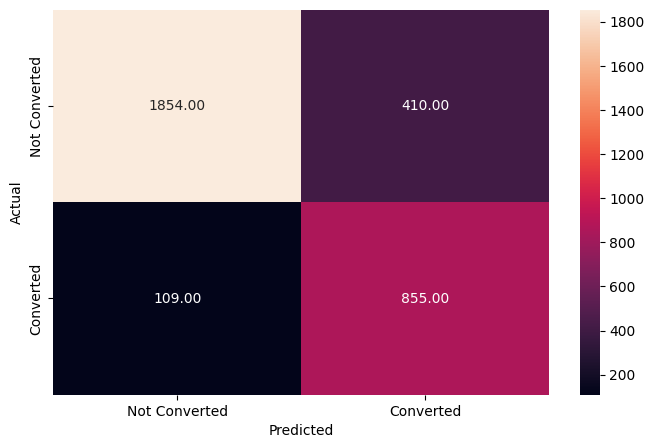

In [ ]:
# Checking random forest performance on the training set
y_pred_train4 = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train4)

**Observations:**

- The scores are no longer 100%, suggesting the model is no longer overfitting the training data.

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       971
           1       0.65      0.85      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.84      0.82      0.83      1384



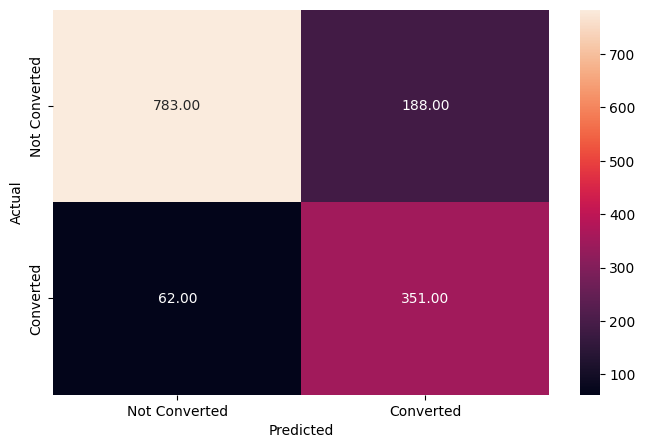

In [ ]:
# Checking random forest performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test4)

**Observations:**
- The recall for class 1 on the test data has significantly improved to 0.85 (from 0.72 before tuning the model).
- While our target score (recall on class  1) increased, other scores slightly decreased after tuning, as the model was tuned to improve the target score, in part due to trade-off between recall and precision.
- However, compared to the decision tree, the random forest recall score for class 1 is slightly lower, 0.85 versus 0.89.

### Macro scores summary

In [ ]:
# Calling macro scores function
rforest_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rforest_tuned_test

,Precision,Recall,Accuracy
0,0.78892,0.82813,0.81936


**Observations:**

- Compared to the last decision tree, the random forest is showing an overall improved performance (with higher average precision, recall, and accuracy).
- The company would be able to decide how much importance to give to these diverse predictions. While the decision tree can provide a slightly higher performance in terms of recall on class 1, it is less robust than the random forest, and therefore it will make more false positive and false negative errors, which would imply inefficient allocation of resources.
- For example, the decision tree has a 24% chance of making a precision error and a 19% chance of making a recall error, while the random forest presents slightly lower chances of 21% and 17%, respectively. In terms of accuracy, the decision tree has as score of 0.78, while the random forest stands at 0.81. As indicated, the decision tree has a higher recall score for class 1 (0.89), versus 0.85 in the random forest. If we assume this score to be relatively similar, the overall performance of the model suggests to use the random forest due to its overall robustness.

**One of the downsides of using ensemble models is that we loose interpretability. We cannot observe the decision rules of random forests in the same way we did for decision trees. So, we can just check which features are more important in the model.**

### Checking feature importance

In [ ]:
# Importance of features in the random forest
print (pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ['Imp'], index=x_train.columns).sort_values(by='Imp', ascending=False))

                                   Imp
time_spent_on_website          0.30430
first_interaction_Website      0.27623
profile_completed_Medium       0.20096
age                            0.05169
last_activity_Website Activity 0.04439
last_activity_Phone Activity   0.04432
current_occupation_Unemployed  0.03783
page_views_per_visit           0.01550
current_occupation_Student     0.01526
website_visits                 0.00716
educational_channels_Yes       0.00132
profile_completed_Low          0.00047
digital_media_Yes              0.00034
print_media_type1_Yes          0.00022
print_media_type2_Yes          0.00000
referral_Yes                   0.00000


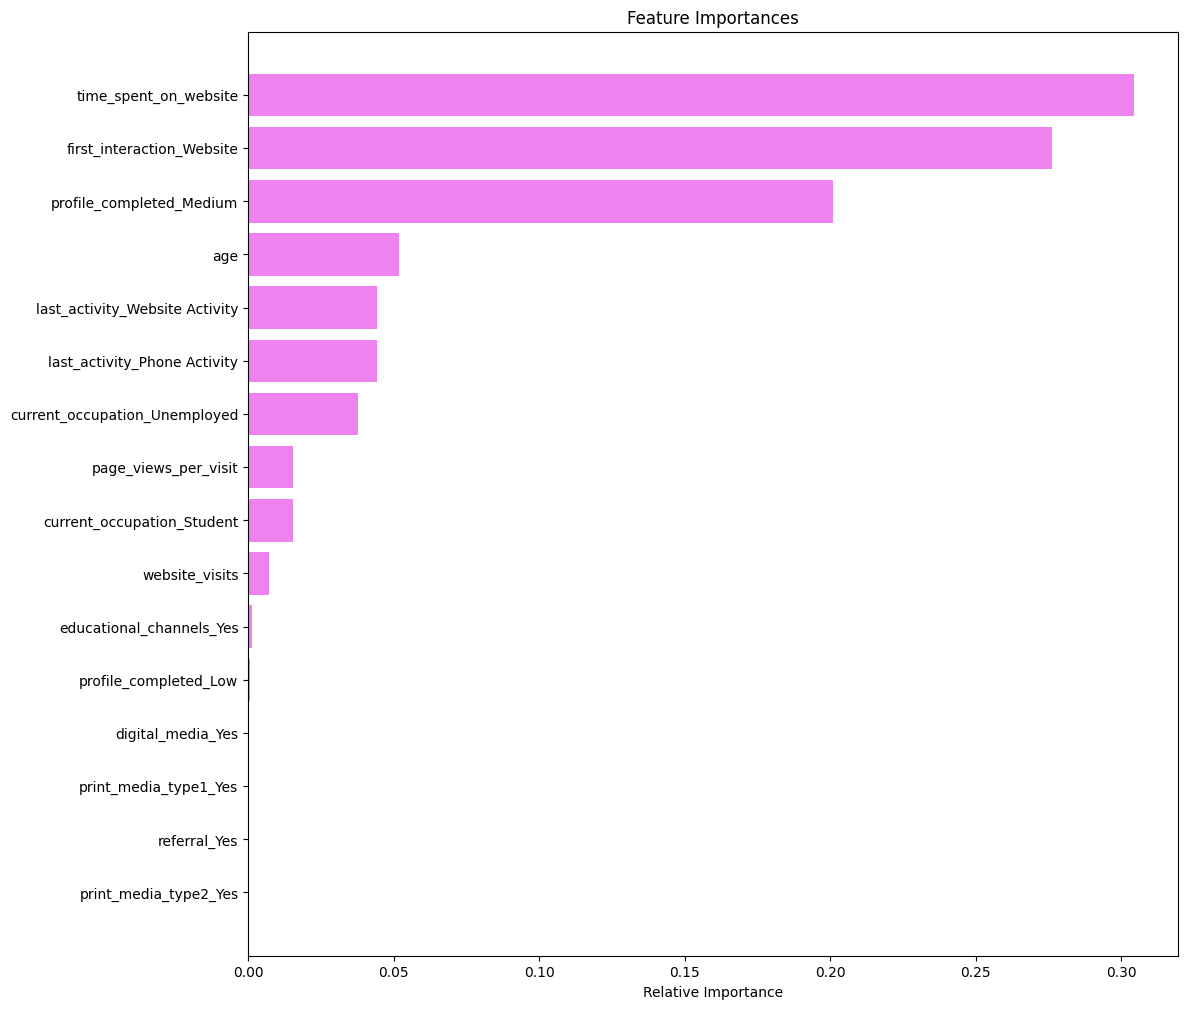

In [ ]:
# Computing and plotting the model feature importance

importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

- As with the decision tree, the random forest indicates that the **most relevant features** for predicting conversion include **time spent on the website, first interaction through website, profile completion, and age**.
- In addition, the random forest includes other features for prediction, including last activity, current occupation, page views per visit, website visits, and educational channels. The exposure to Print Media Type1 and digital media is negligible in predicting conversion rates, while referrals are deemed irrelevant, as this could reflect their small number. Thus, the random forest provides a less biased, more complex approach to the problem and captures the patterns associated with more variables.

### Random Forest Tuning - Alternative Optimization

In [ ]:
# Exploring an alternative hyperparameter grid to see if we obtain improved performance

# Choosing the type of classifier
rf_estimator_tuned2 = RandomForestClassifier(criterion='entropy', random_state=1)

# Grid of parameters to choose from
parameters_rf2 = {
    'n_estimators': [100, 120],
    'max_depth': [2, 4, 6],
    'min_samples_split': [5, 10, 20],
    'ccp_alpha' : [0.0, 0.001, 0.01],
    'class_weight': ['balanced', {0: 0.3, 1: 0.7}]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Runnig the grid search on the training data using scorer=scorer and cv=5
grid_obj3 = GridSearchCV (rf_estimator_tuned2, parameters_rf2, scoring=scorer, cv=5)

grid_obj3 = grid_obj3.fit (x_train, y_train)

# Saving the best estimator to variable rf_estimator_tuned2
rf_estimator_tuned2 = grid_obj3.best_estimator_

#Fitting the best estimator to the training data
rf_estimator_tuned2.fit (x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, min_samples_split=5, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.80      0.86      2264
           1       0.65      0.90      0.75       964

    accuracy                           0.83      3228
   macro avg       0.80      0.85      0.81      3228
weighted avg       0.86      0.83      0.83      3228



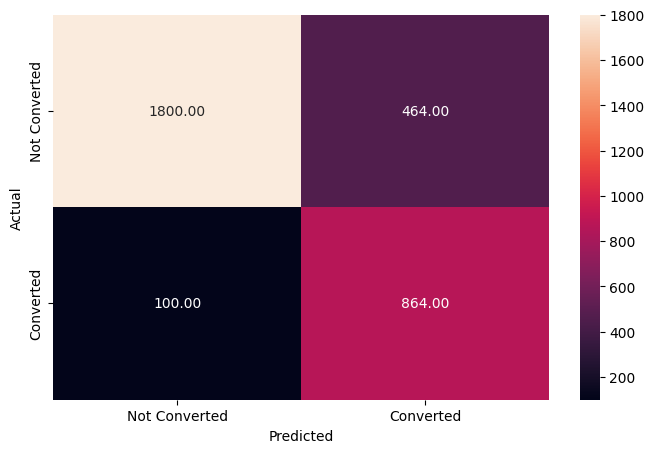

In [ ]:
# Checking random forest performance on the training data
y_pred_train5 = rf_estimator_tuned2.predict(x_train)

metrics_score(y_train, y_pred_train5)

**Observation:**

Performance on the training data has improved from the last random forest.

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       971
           1       0.65      0.89      0.75       413

    accuracy                           0.83      1384
   macro avg       0.80      0.84      0.81      1384
weighted avg       0.86      0.83      0.83      1384



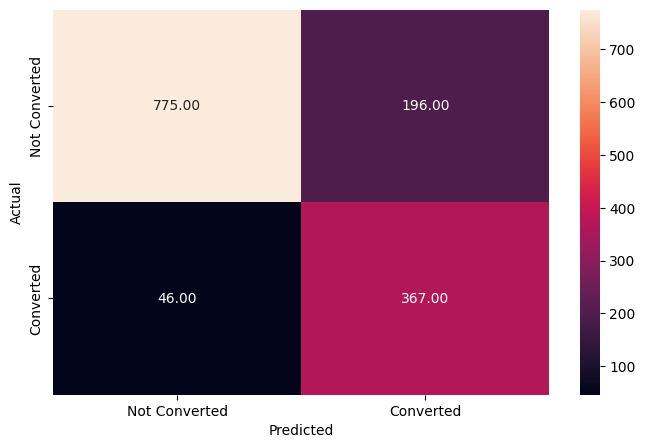

In [ ]:
# Checking random forest performance on the test data
y_pred_test5 = rf_estimator_tuned2.predict(x_test)

metrics_score(y_test, y_pred_test5)

**Observation:**

The score for class 1 on the test data has improved to 0.89 from 0.85 in the previous random forest. Let's check the model overall performance.

In [ ]:
# Calling macro scores function
rforest_tuned_test2 = model_performance_classification(rf_estimator_tuned2, x_test, y_test)
rforest_tuned_test2

,Precision,Recall,Accuracy
0,0.79792,0.84338,0.82514


**Observations:**

- Overall performance on the test data has improved compared to the previous random forest.
- The previous model (Random Forest1) has a 21% chance of making a precision error and a 17% chance of making a recall error, while the current model (Random Forest2) shows slightly lower chances of 20% and 16%, respectively. In terms of accuracy, Random Forest1 has a score of 0.81, while Random Forest2 stands at 0.83.

### Checking feature importance

In [ ]:
# Importance of features
print (pd.DataFrame(rf_estimator_tuned2.feature_importances_, columns = ['Imp'], index=x_train.columns).sort_values(by='Imp', ascending=False))

                                   Imp
time_spent_on_website          0.34759
first_interaction_Website      0.32460
profile_completed_Medium       0.09852
current_occupation_Student     0.06412
age                            0.04846
last_activity_Phone Activity   0.03996
last_activity_Website Activity 0.02863
profile_completed_Low          0.01917
referral_Yes                   0.01752
page_views_per_visit           0.00574
website_visits                 0.00299
current_occupation_Unemployed  0.00262
print_media_type2_Yes          0.00009
print_media_type1_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000


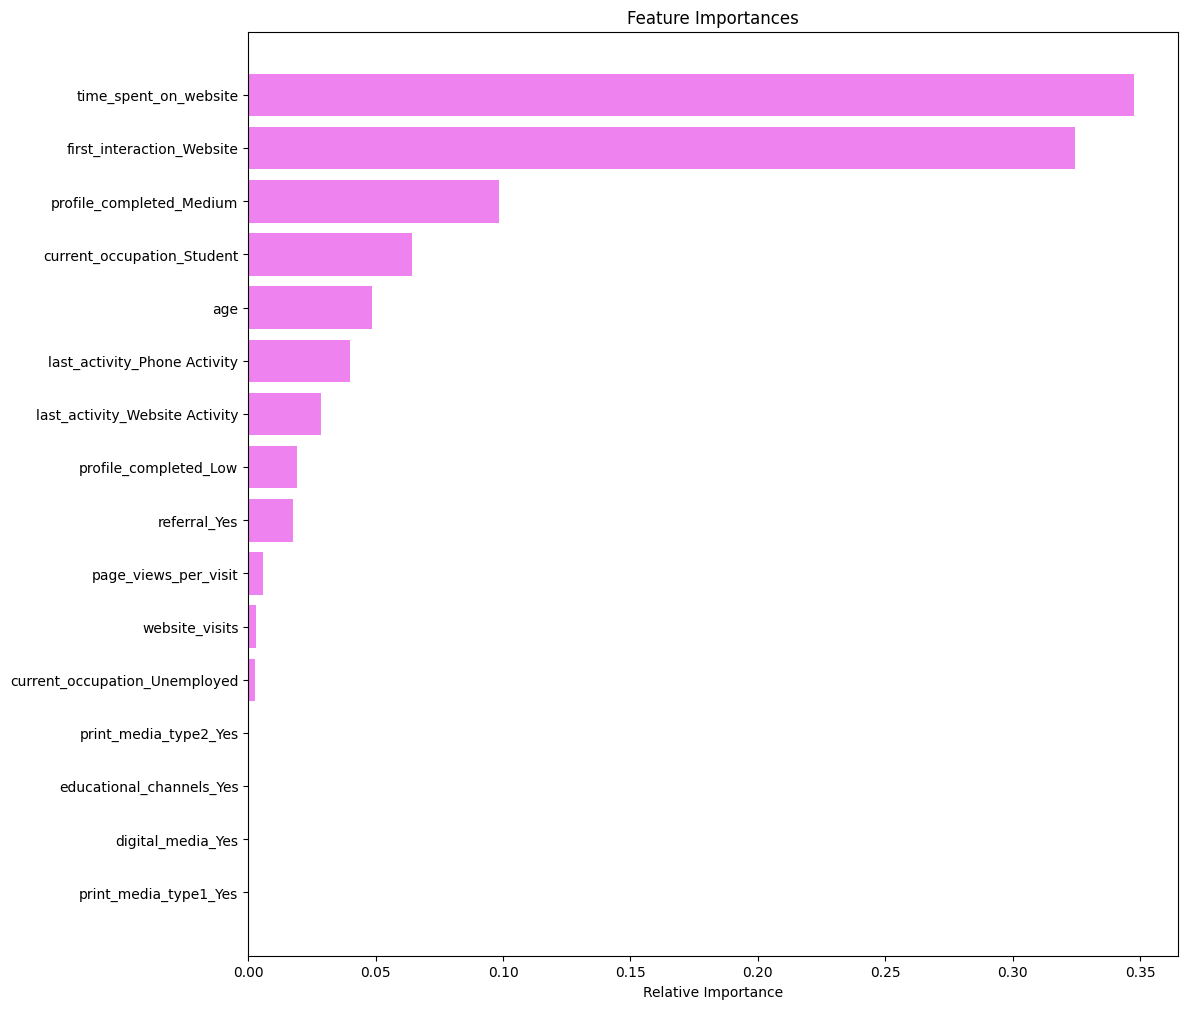

In [ ]:
# Computing and plotting the model feature importance

importances = rf_estimator_tuned2.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

- The model confirms that the **most relevant features** for predicting conversion include **time spent on the website, first interaction through website, and profile completion**.
- However, this model has given more relevance to a broader set of parameters, including occupation, age, last activity, referrals, page views per visit, and website visits.
- The exposure to print media and digital media is negligible in predicting conversion rates.

## Actionable Insights and Recommendations


### **Conclusions:**

- The best model identified is the optimized random forest (Random Forest2), achieving approximately 89% recall for class 1 on test data. This model should be utilized by the company to predict which leads are more likely to convert, allowing for more efficient resource allocation.
- Key predictors of lead conversion include time spent on the website, first interaction through the website, and profile completion.

### **Recommendations:**

1. **Focus on Key Features:**
Allocate resources and marketing efforts towards leads who spend more time on the website and have a high profile completion level.
Pay special attention to leads who initiate their interaction through the website, as this group tends to have a higher likelihood of conversion.
2. **Marketing Channel Optimization:**
Given that the majority of leads initiate contact through the website, invest in optimizing the website experience to further engage potential customers. Evaluate the effectiveness of other channels like mobile apps, email, and phone interactions to maximize conversions. A well-trained workforce should provide all the key information and leverage customer experience.
3. **Targeted Engagement:** Since professionals are the largest segment of leads, tailor marketing and engagement strategies specifically for them, while also addressing the aspirations of unemployed individuals and student segments.
4. **Appeal to Diverse Demographics:** Tailor communication and offerings to different age groups, with special focus on older segments, reflecting the skew in conversion data.
5. **Ad Campaign Strategy:**
Reevaluate advertising strategies, particularly in print media and digital media, to enhance visibility for potential leads.
6. **Educational Channels:**
Leverage educational channels for broader audience outreach, as they exhibit relatively high visibility. Consider implementing referral programs to encourage existing customers to refer potential leads, as referrals can be a valuable source of conversion.
7. **Continuous Monitoring:**
Regularly monitor and assess the model's performance and adapt strategies as needed to stay competitive in lead conversion. Stay updated with changing trends and customer preferences in the Edtech industry.
8. **Data Collection and Feedback:**
Continue collecting data on leads' interactions and preferences to refine marketing and conversion strategies. Encourage leads to provide feedback to improve the overall lead nurturing process.
9. **Evaluate Competitor Strategies:**
Analyze the strategies employed by competitors in the Edtech sector and adapt to industry trends to stay competitive.

These recommendations are designed to assist TechLever+ in the more effective identification and conversion of leads, optimizing resource allocation and enhancing the overall lead nurturing process.




